In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Apple Dataset.csv")
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10954 non-null  object 
 1   Open       10954 non-null  float64
 2   High       10954 non-null  float64
 3   Low        10954 non-null  float64
 4   Close      10954 non-null  float64
 5   Adj Close  10954 non-null  float64
 6   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
5,12/19/1980,0.126116,0.126674,0.126116,0.126116,0.097335,48630400
6,12/22/1980,0.132254,0.132813,0.132254,0.132254,0.102072,37363200
7,12/23/1980,0.137835,0.138393,0.137835,0.137835,0.106380,46950400
8,12/24/1980,0.145089,0.145647,0.145089,0.145089,0.111978,48003200
9,12/26/1980,0.158482,0.159040,0.158482,0.158482,0.122315,55574400


In [ ]:
# convert format Date
df["Date"] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10954 non-null  datetime64[ns]
 1   Open       10954 non-null  float64       
 2   High       10954 non-null  float64       
 3   Low        10954 non-null  float64       
 4   Close      10954 non-null  float64       
 5   Adj Close  10954 non-null  float64       
 6   Volume     10954 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 599.2 KB


In [ ]:
# IS NA ?
if not df.isna().any().any():
    print("Data don't contain null values.")
else:
    # Điền giá trị NaN bằng median của từng cột
    df.fillna(df.median(), inplace=True)
    print("Data contained null values, but they have been filled with the median.")



Data don't contain null values.


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


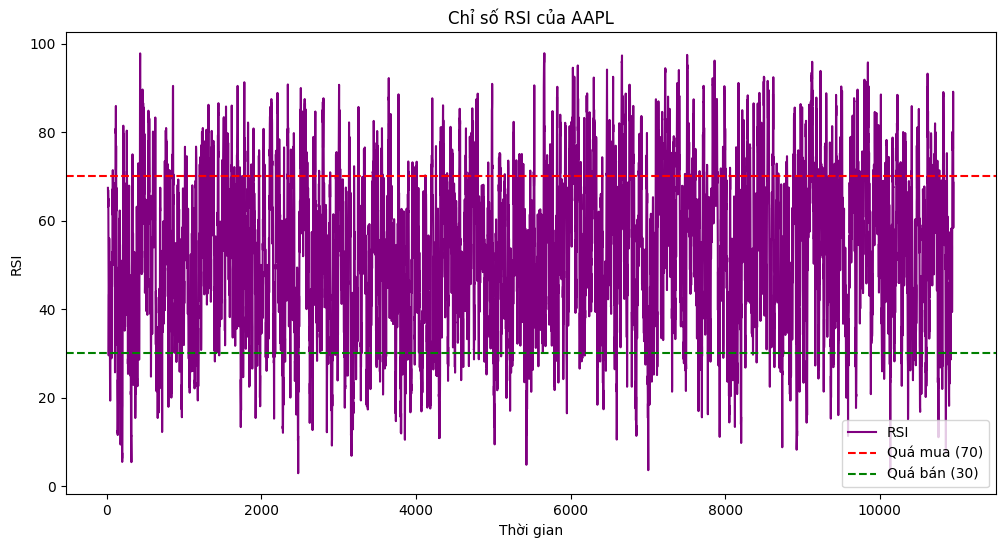

In [ ]:
# stock_data= df
# def calculate_rsi(data, window=14):
#     delta = data['Close'].diff(1)
#     gain = delta.where(delta > 0, 0)
#     loss = -delta.where(delta < 0, 0)

#     avg_gain = gain.rolling(window=window).mean()
#     avg_loss = loss.rolling(window=window).mean()

#     rs = avg_gain / avg_loss
#     rsi = 100 - (100 / (1 + rs))

#     return rsi

# stock_data['RSI'] = calculate_rsi(stock_data)

# # Vẽ chỉ số RSI
# plt.figure(figsize=(12, 6))
# plt.plot(stock_data['RSI'], label='RSI', color='purple')
# plt.axhline(70, color='red', linestyle='--', label='Quá mua (70)')
# plt.axhline(30, color='green', linestyle='--', label='Quá bán (30)')
# plt.title('Chỉ số RSI của AAPL')
# plt.xlabel('Thời gian')
# plt.ylabel('RSI')
# plt.legend()
# plt.show()
#RSI có những lúc vượt lên trên mức vùng quá mua, cho thấy giá cổ phiếu có thể đang tăng quá mạnh và có nguy cơ điều chỉnh giảm.
#RSI cũng có những lúc giảm xuống dưới mức 30 (vùng quá bán), thể hiện giá cổ phiếu có thể đang bị bán quá mức và có khả năng tăng trở lại.
#RSI là chỉ số đo lưỡngucws mạnh,  tốc độ biến động giá trong một khỏng thời gian

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
def describle(df: pd.DataFrame )-> pd.DataFrame:
	df_min= df.min()
	df_max= df.max()
	df_mean= df.mean()
	df_median= df.median()
	df_count= df.count()
	df_q1= df.quantile(0.25)
	df_q2= df.quantile(0.5)
	df_q3= df.quantile(0.75)
	df_iqr= df.quantile(0.75)- df.quantile(0.25)
	df_std= df.std()
	df_mode= df.mode().values[0]
	data = pd.DataFrame({
		"min":df_min,
		"max":df_max,
		"mean":df_mean,
		"count":df_count,
		"Q1":df_q1,
		"Q2":df_q2,
		"Q3":df_q3,
		"IQR":df_q3-df_q2,
		"std":df_std,
		"mode": df_mode
	})
	return data


In [ ]:
data= df.drop(columns=["Date"])
describle(data).transpose()

,Open,High,Low,Close,Adj Close,Volume
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09
mean,21.530877,21.761904,21.308220,21.544072,20.747506,3.190792e+08
count,10954.000000,10954.000000,10954.000000,10954.000000,10954.000000,1.095400e+04
Q1,0.296875,0.303571,0.290179,0.296875,0.241624,1.139936e+08
Q2,0.522321,0.533482,0.513393,0.524554,0.427333,2.067128e+08
Q3,19.767500,19.888572,19.457768,19.682679,17.048054,3.993444e+08
IQR,19.245179,19.355090,18.944375,19.158126,16.620721,1.926316e+08
std,44.458386,44.931856,44.013578,44.492483,44.038943,3.357446e+08
mode,0.354911,0.372768,0.357143,0.399554,0.085276,2.464000e+08


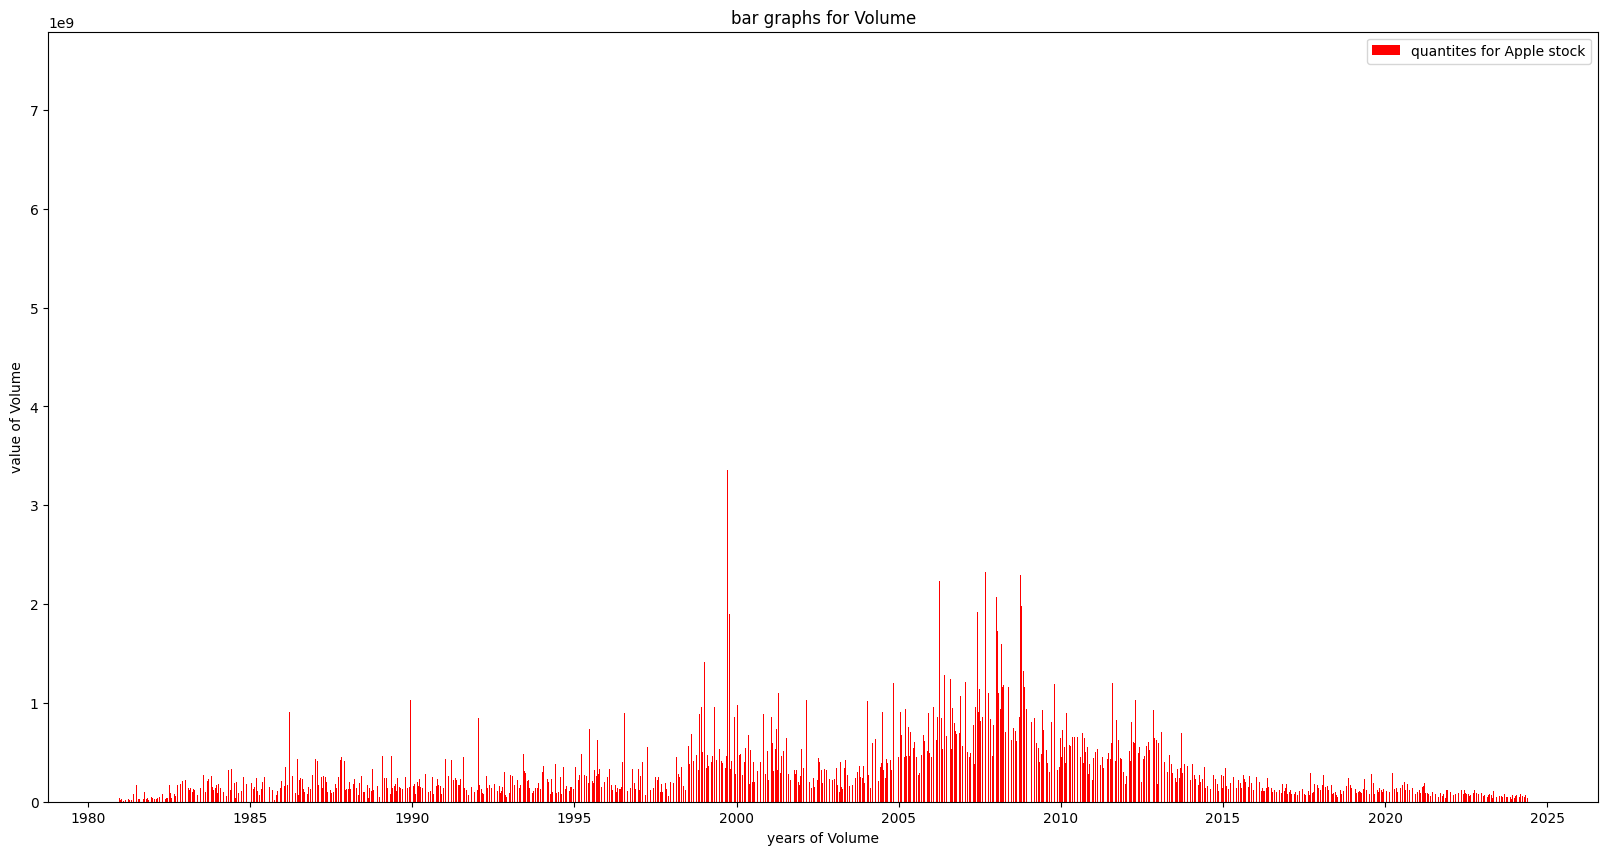

In [ ]:
def bar(df:pd.DataFrame, str:str):
  plt.figure(figsize=(20, 10))
  plt.title(f"bar graphs for {str}")
  plt.bar(df["Date"], df[str], label="quantites for Apple stock", color="red")
  plt.xlabel(f"years of {str}")
  plt.ylabel(f"value of {str}")
  plt.legend()
  plt.show()
# khoi luong giao dich
bar(df, "Volume")

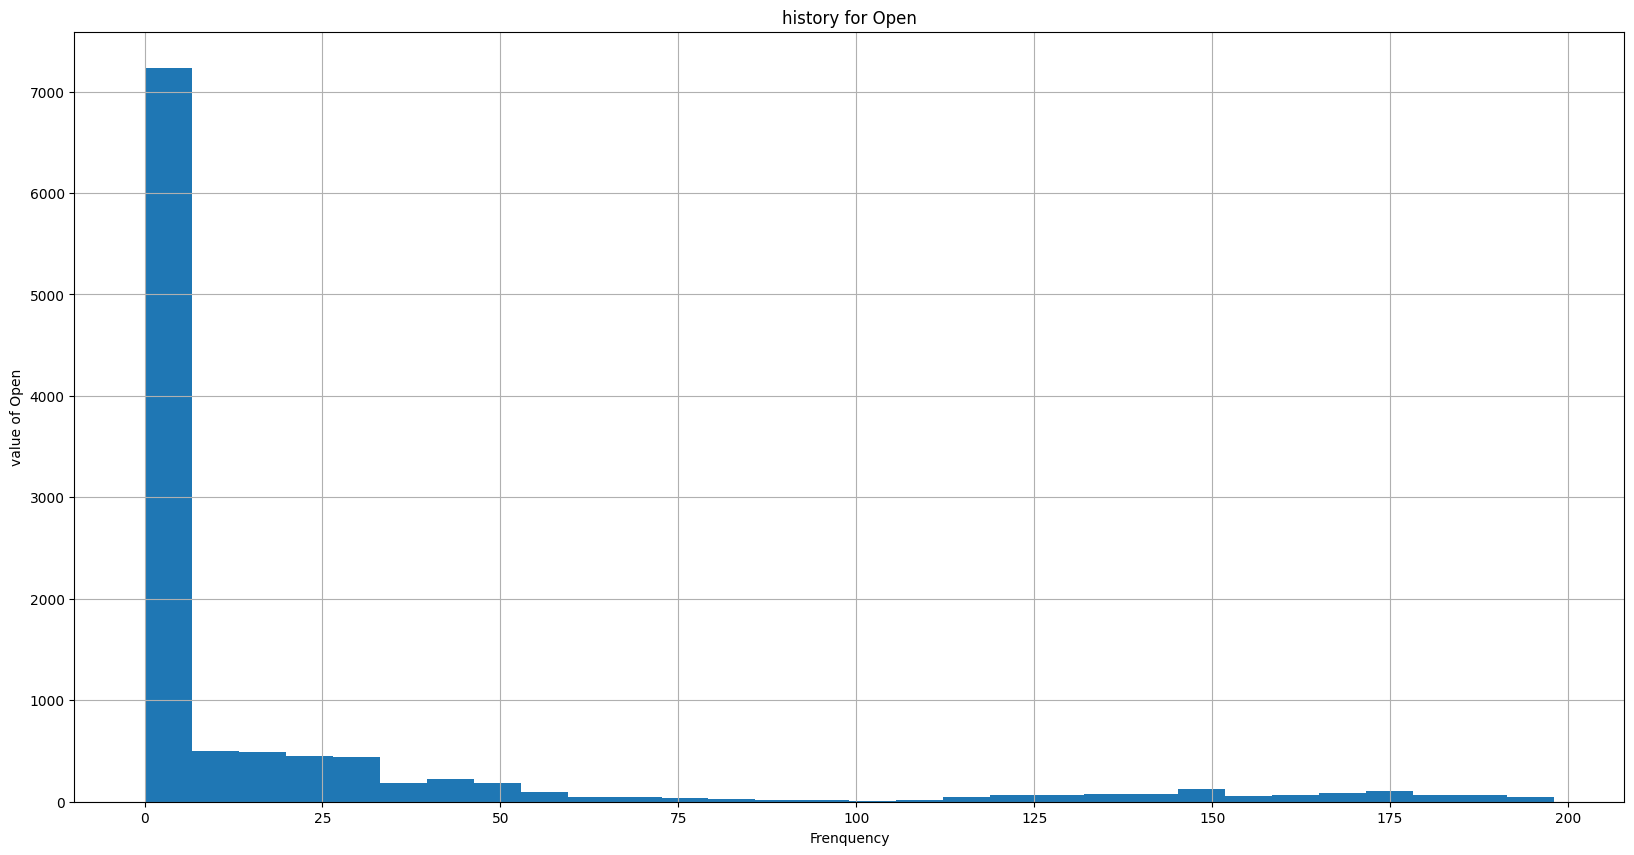

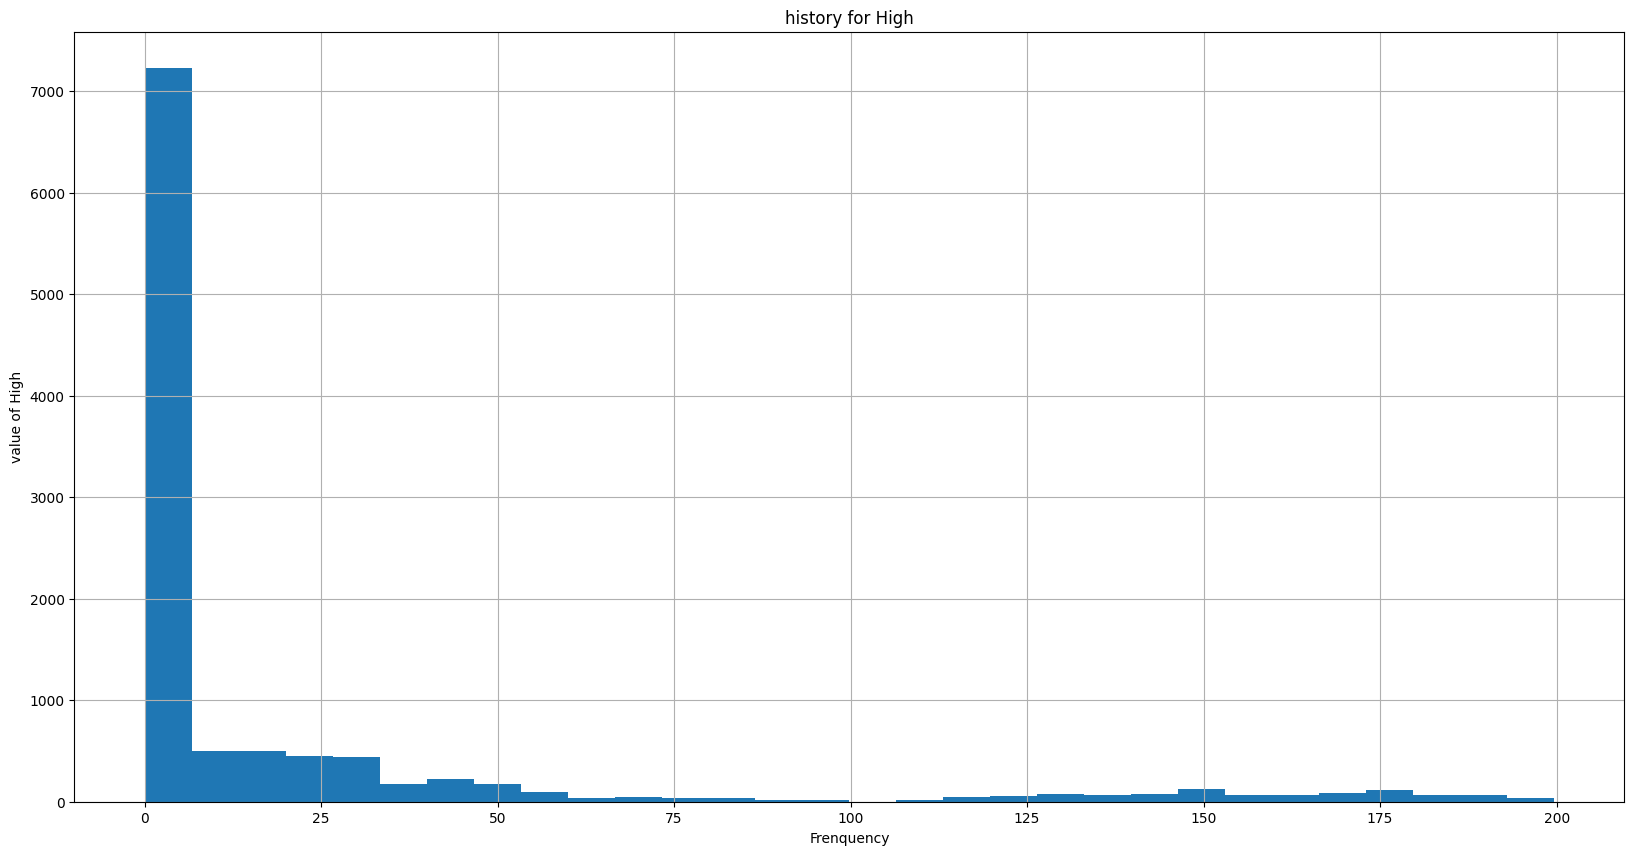

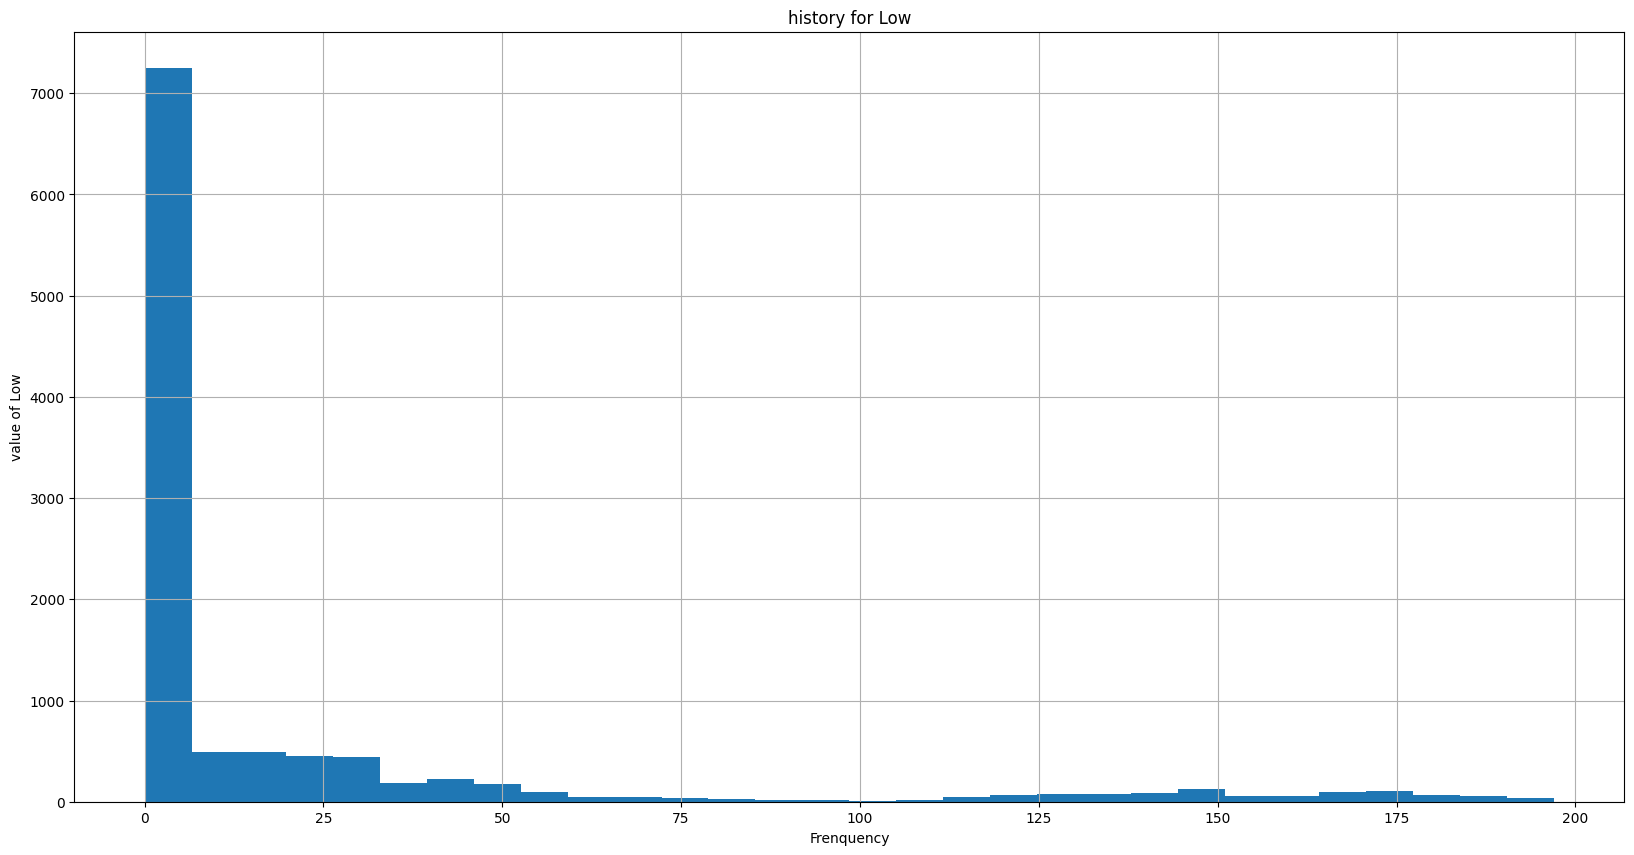

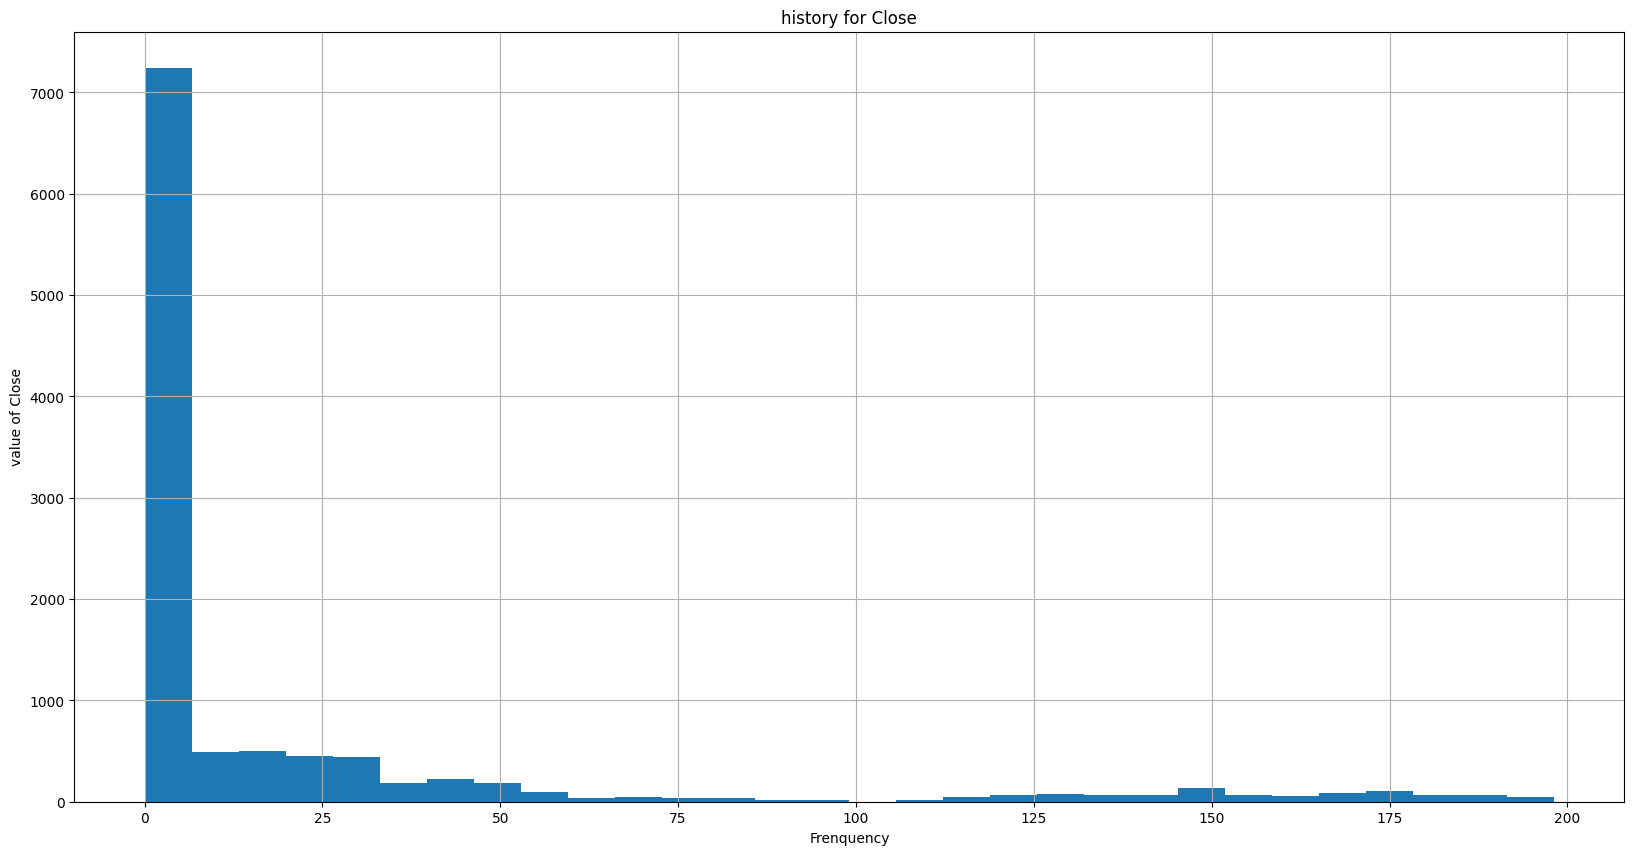

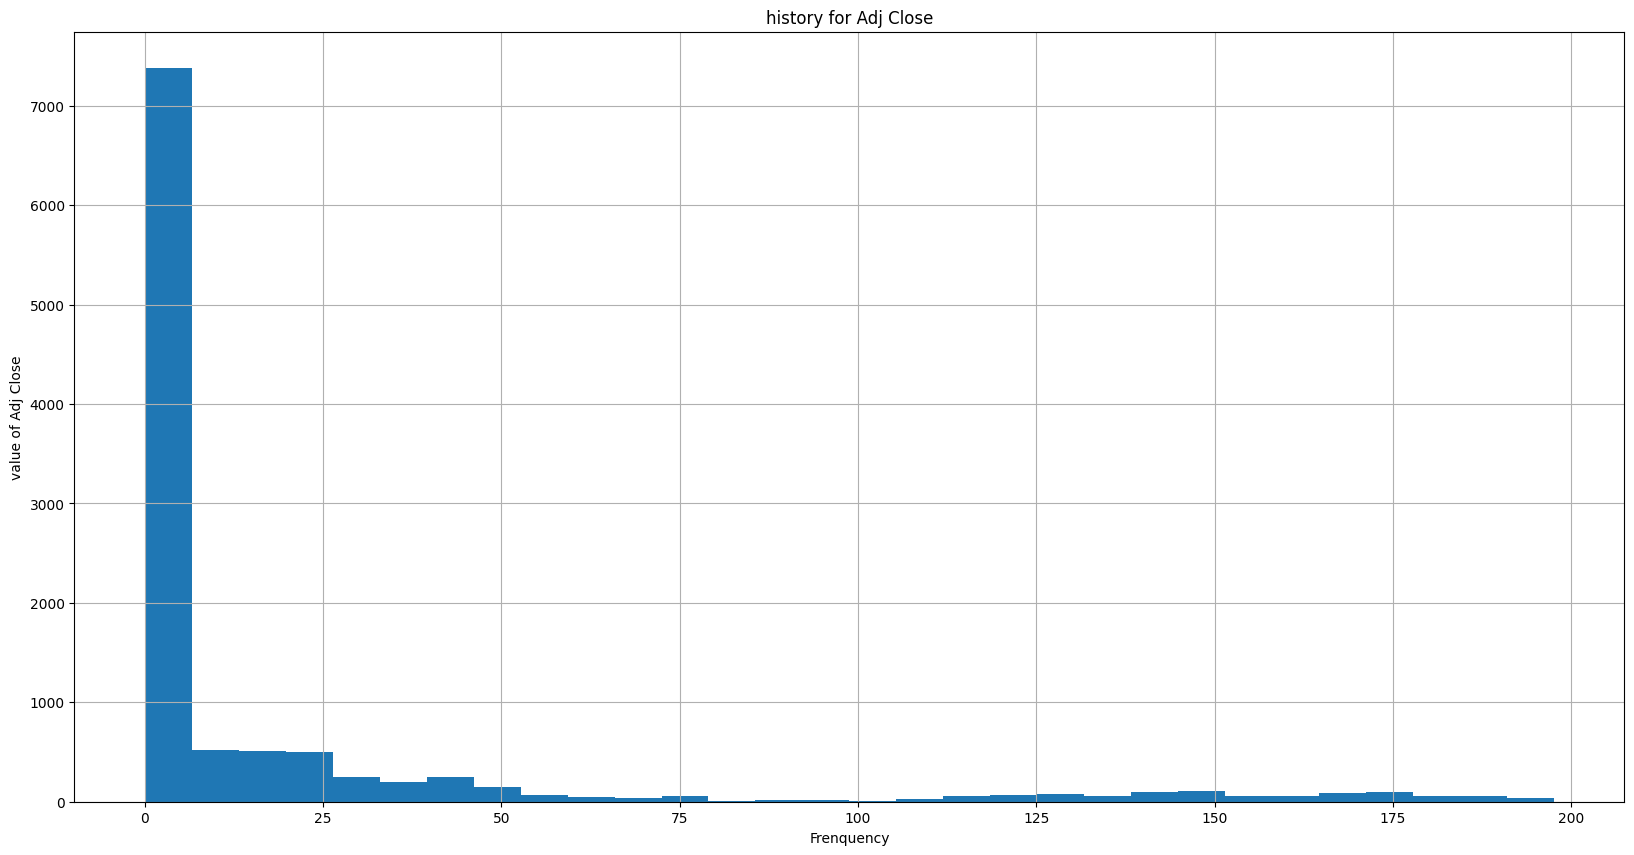

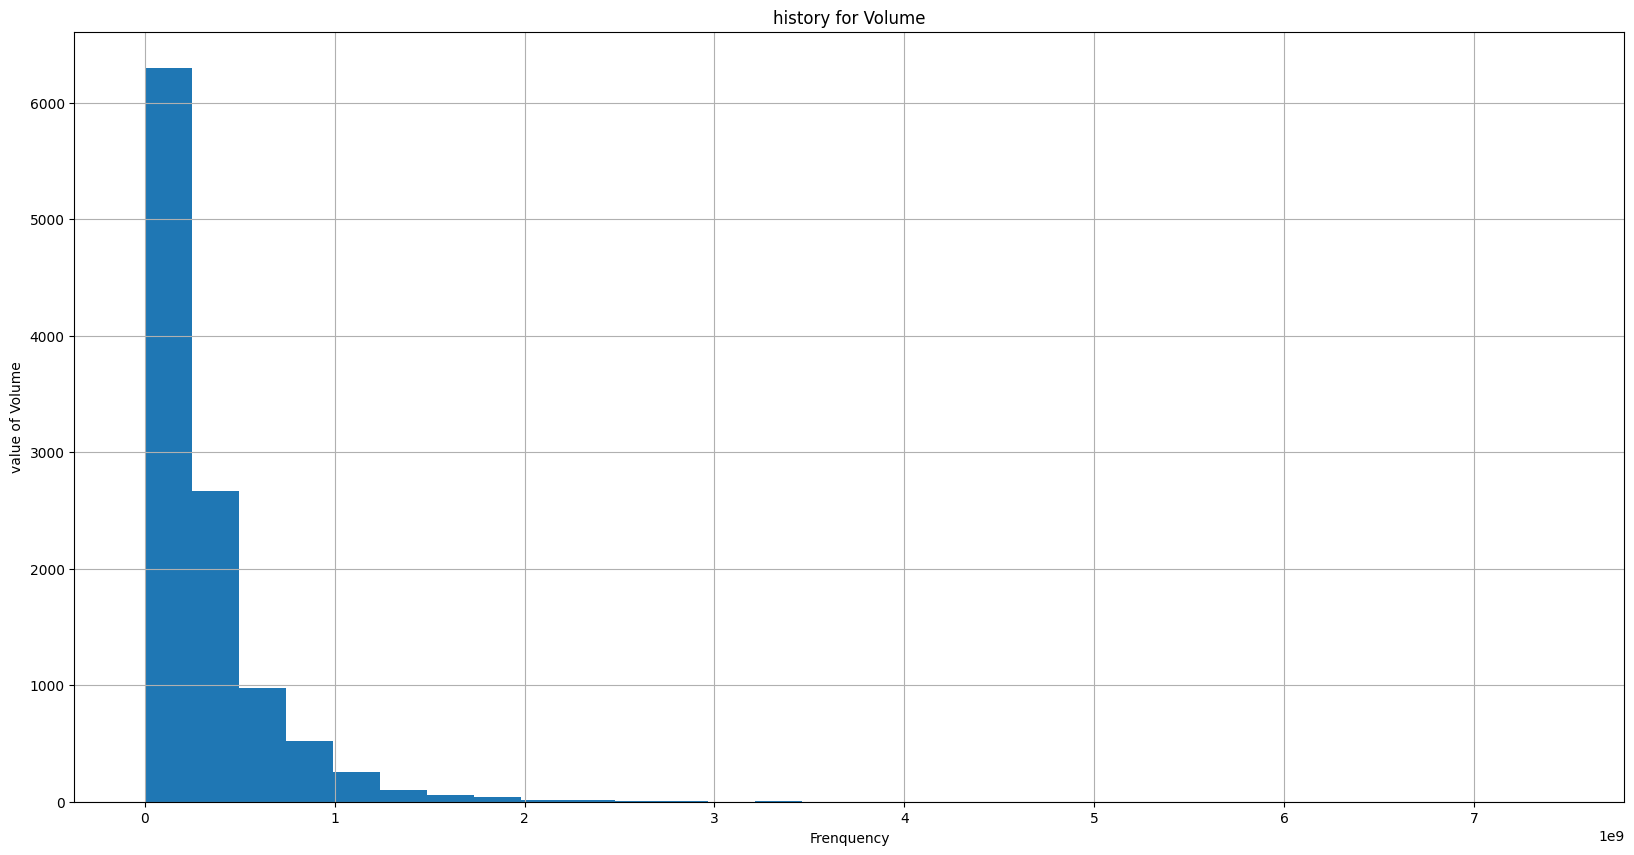

In [ ]:
# bieu do cot
def hist(df:pd.DataFrame, str:str):
  plt.figure(figsize=(20, 10))
  plt.title(f"history for {str}")
  plt.hist(df[str], bins=30)
  plt.xlabel(f"Frenquency")
  plt.ylabel(f"value of {str}")
  plt.grid()
  plt.show()
for i in df.columns:
	if i != "Date":
		hist(df, i)

In [ ]:
def box_plot(df: pd.DataFrame, str:str):
	plt.title(f"box plot for {str}")
	plt.boxplot(df[str])
	plt.ylabel(f'Frenquency')
	plt.show()

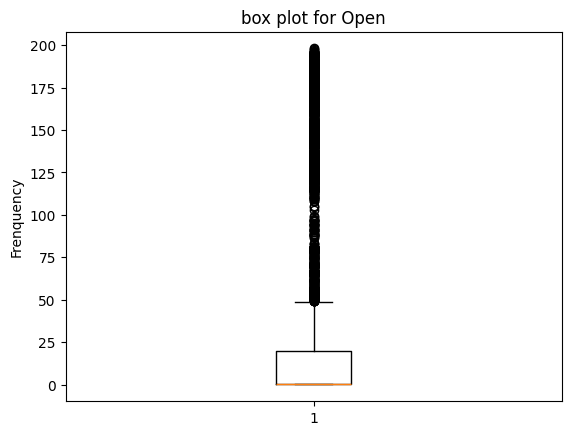

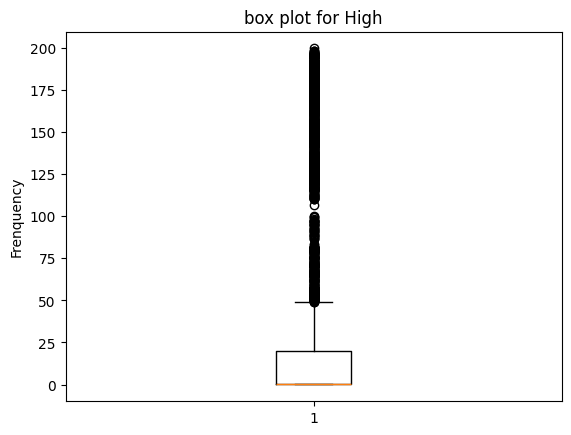

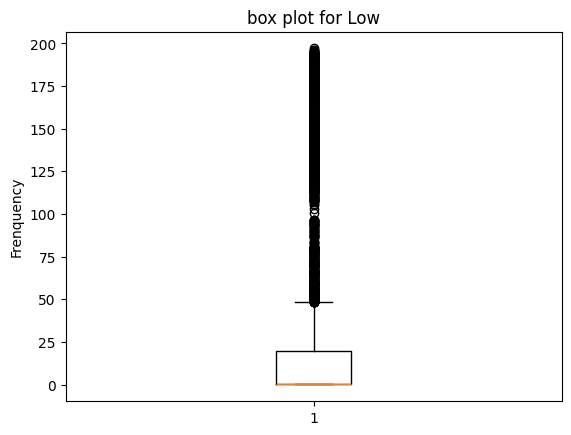

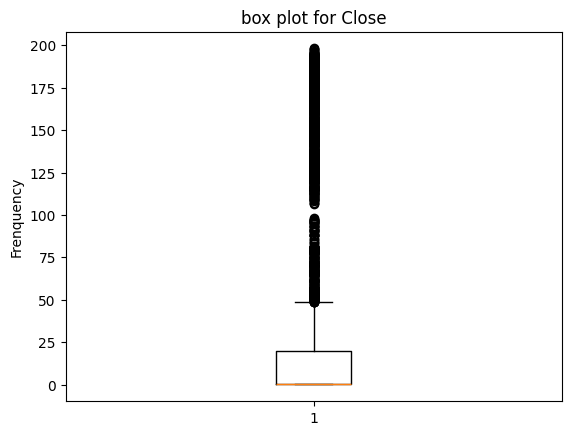

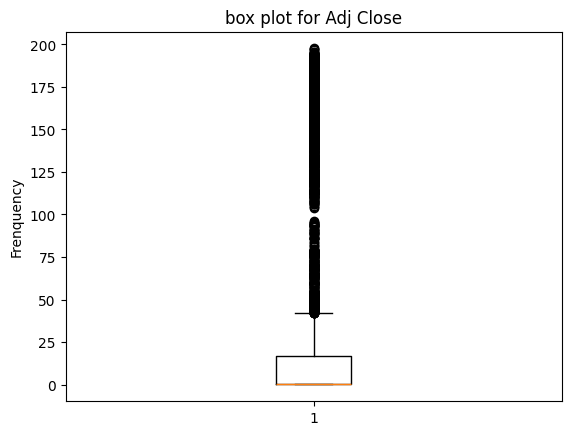

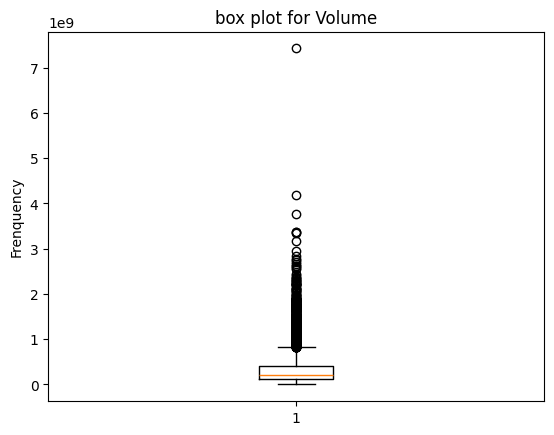

In [ ]:
for i in df.columns:
	if i != "Date":
		box_plot(df, i)

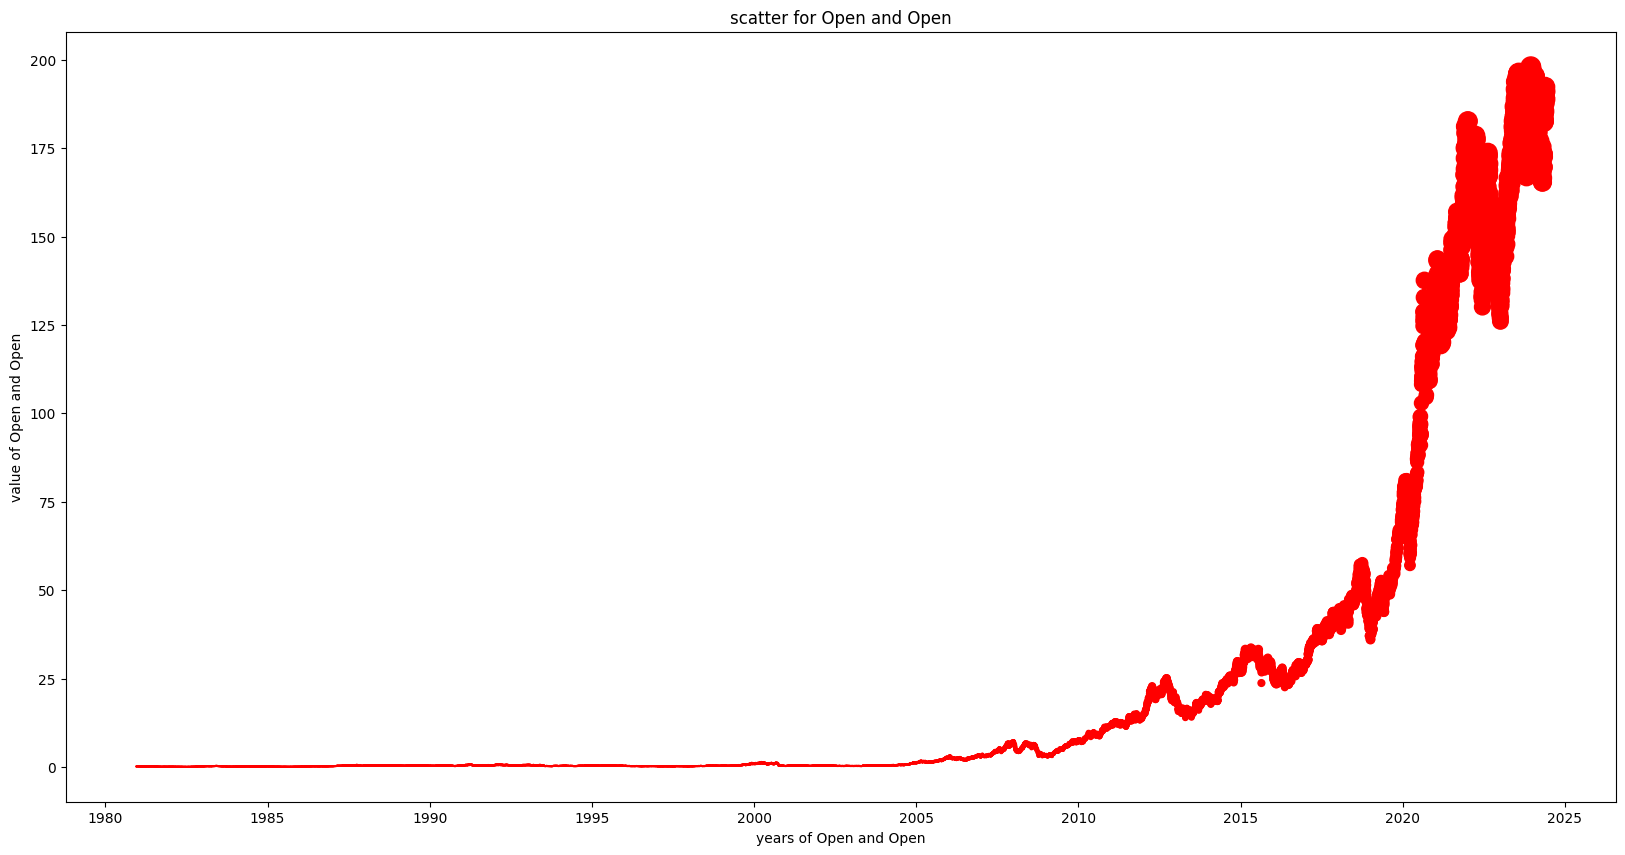

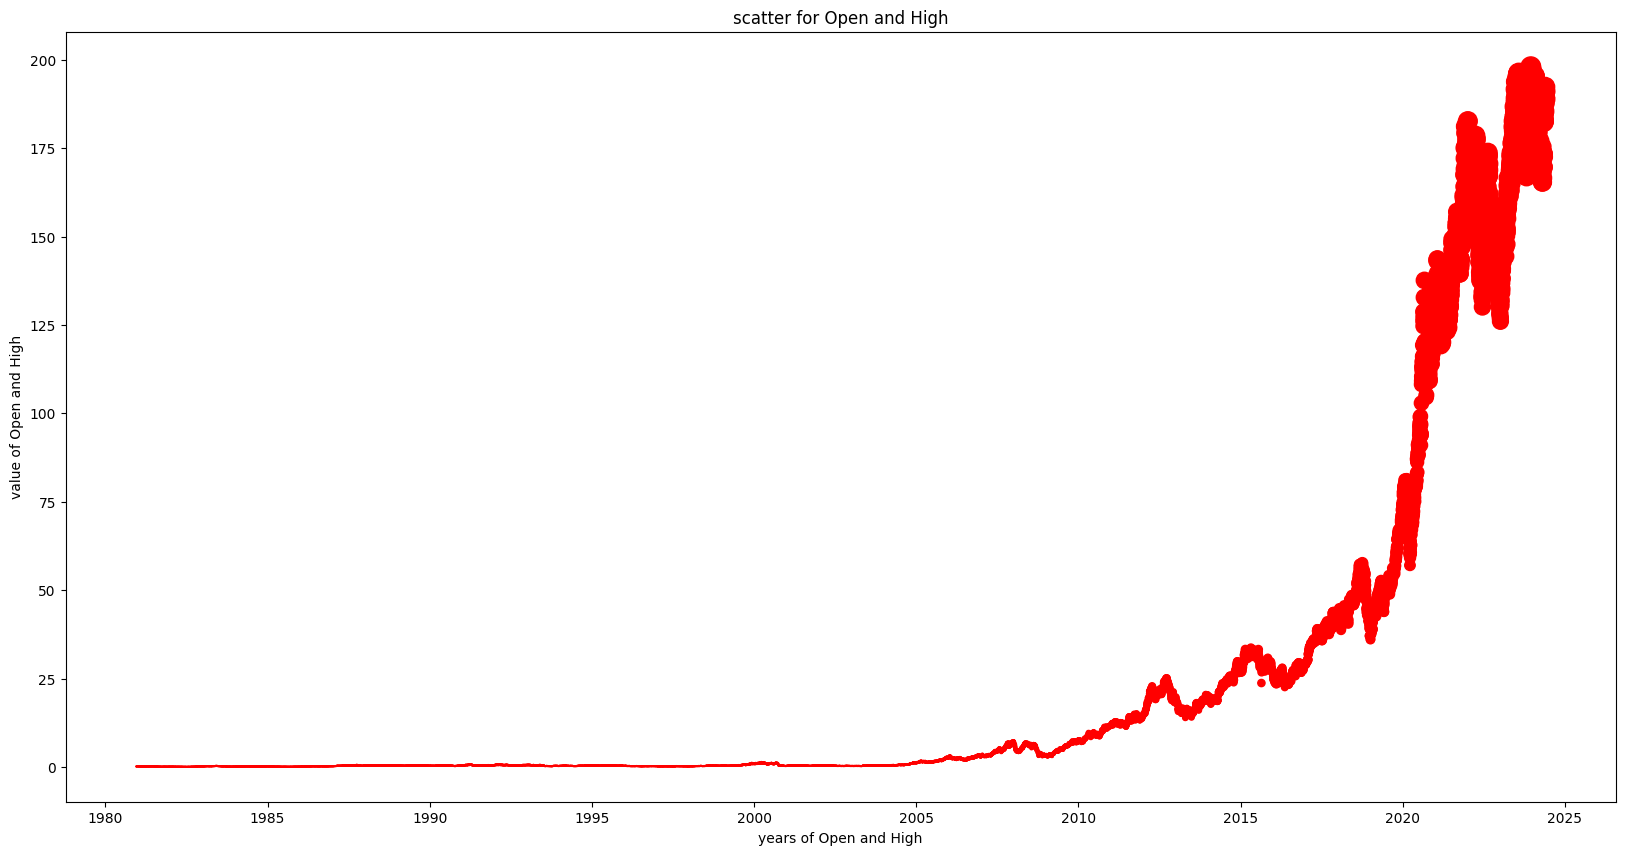

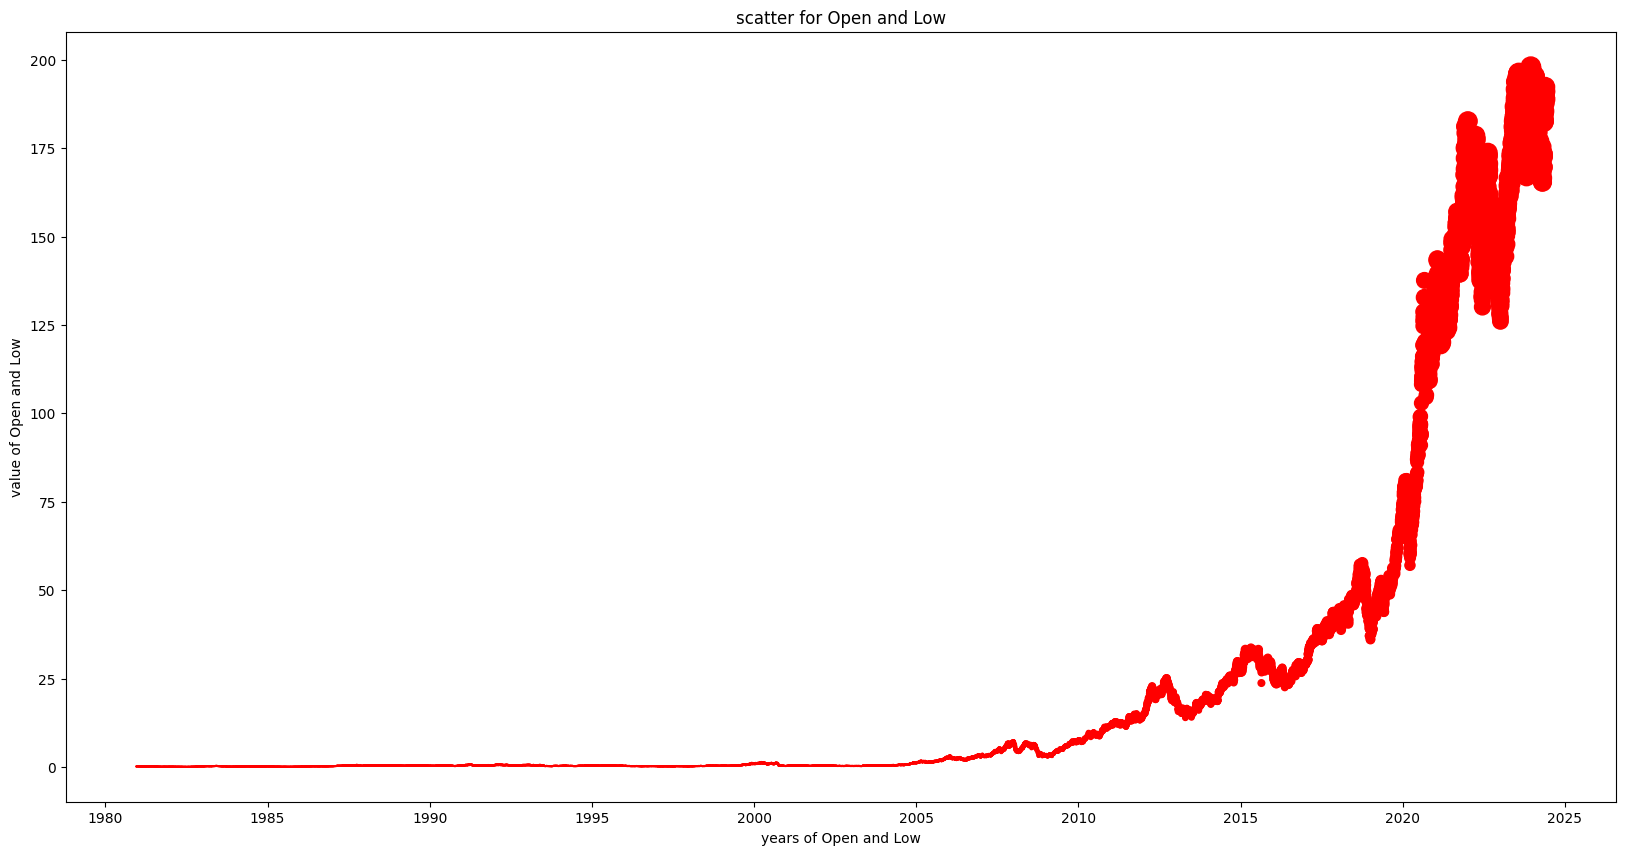

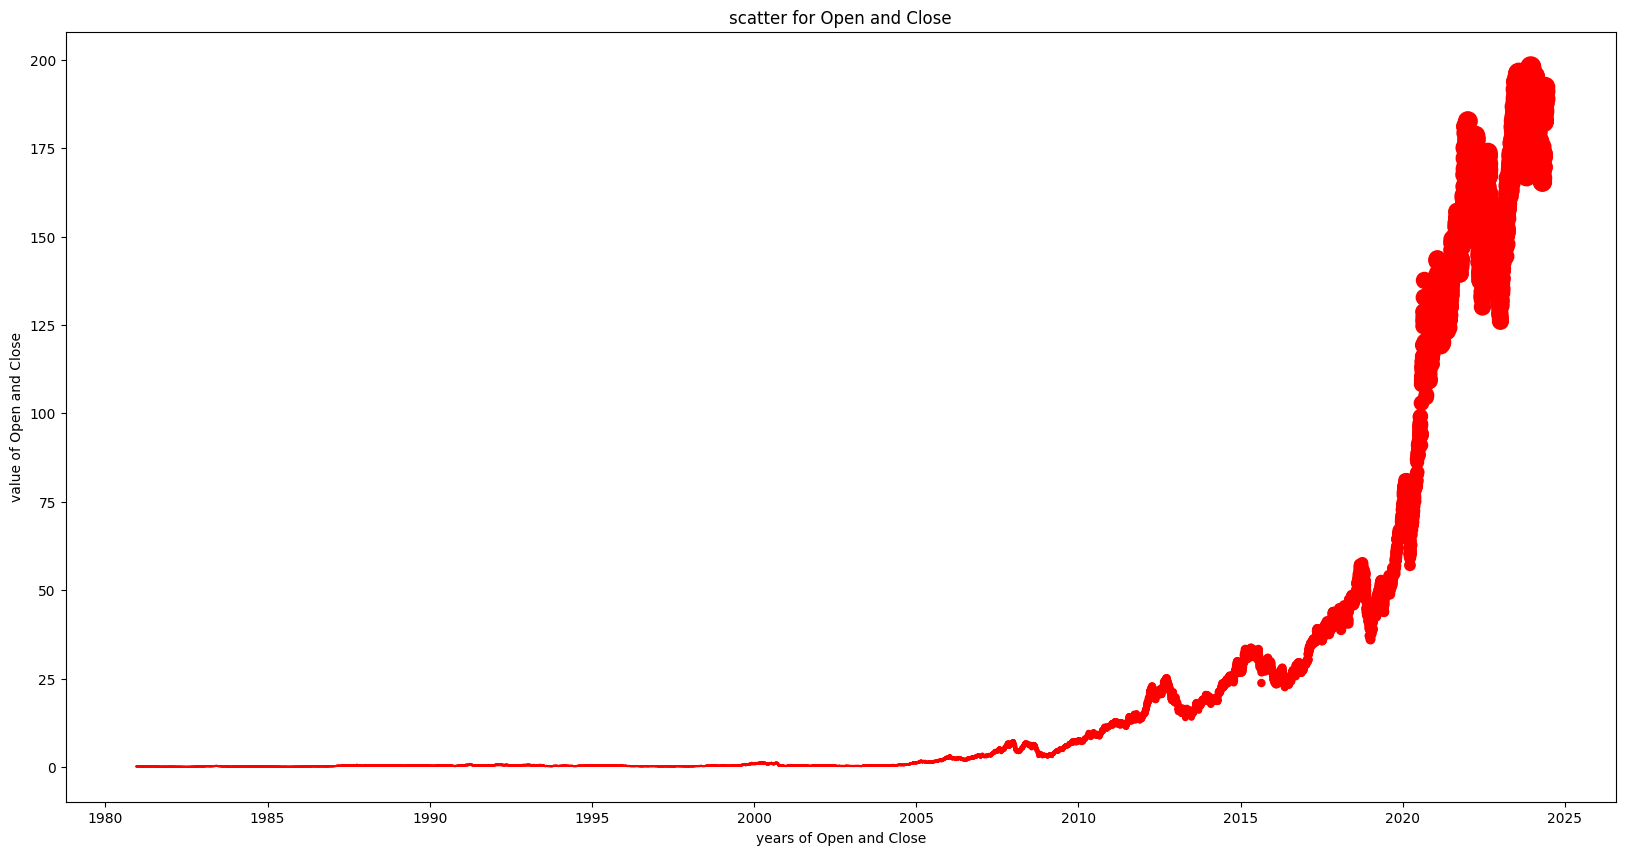

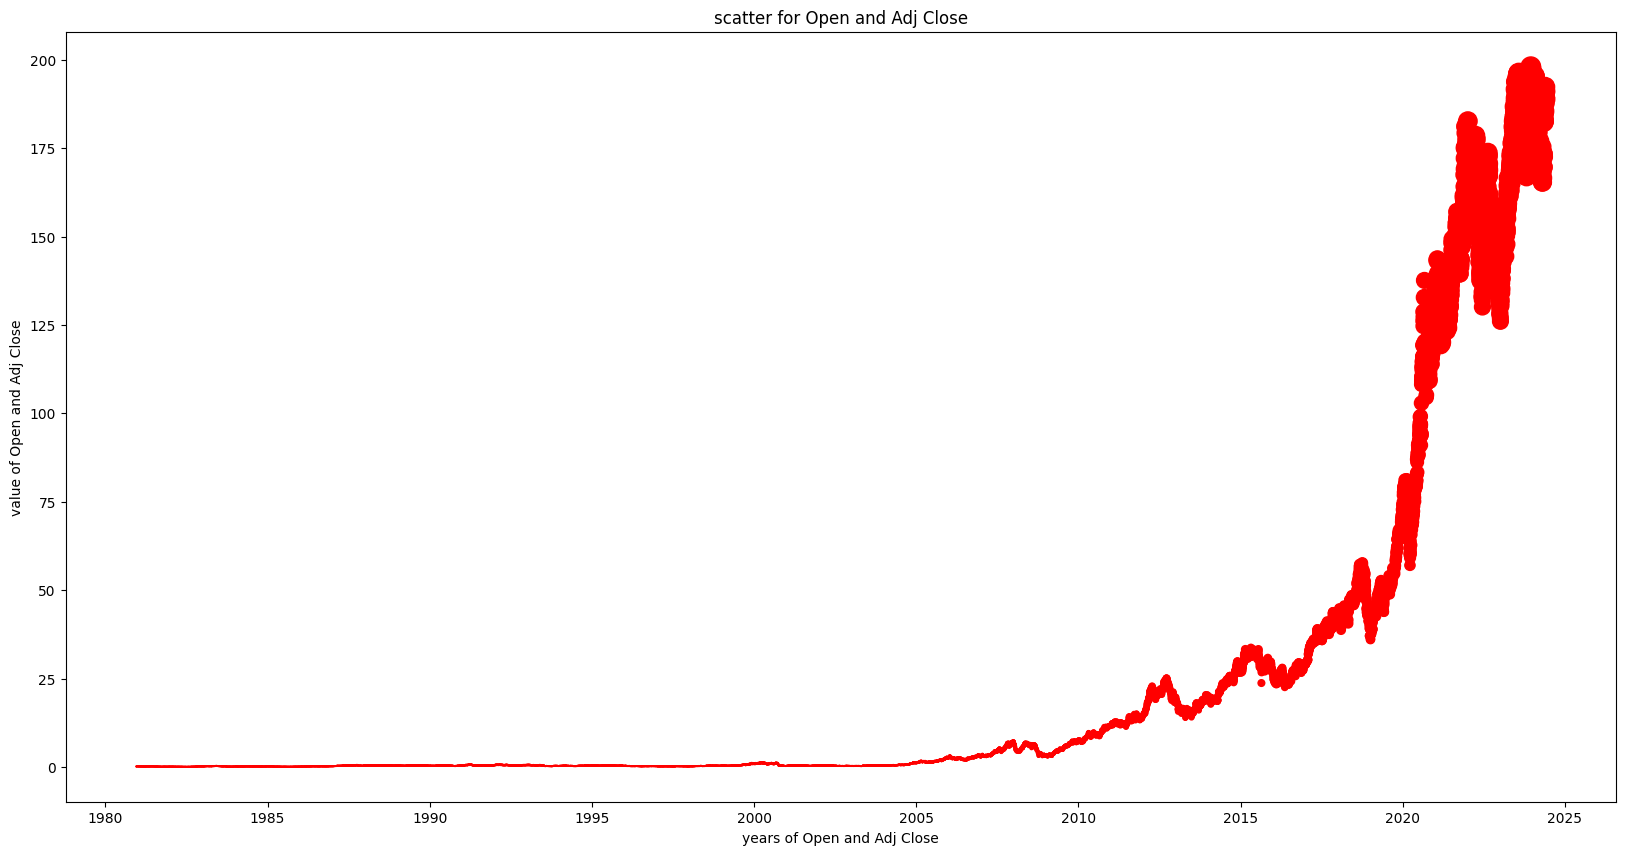

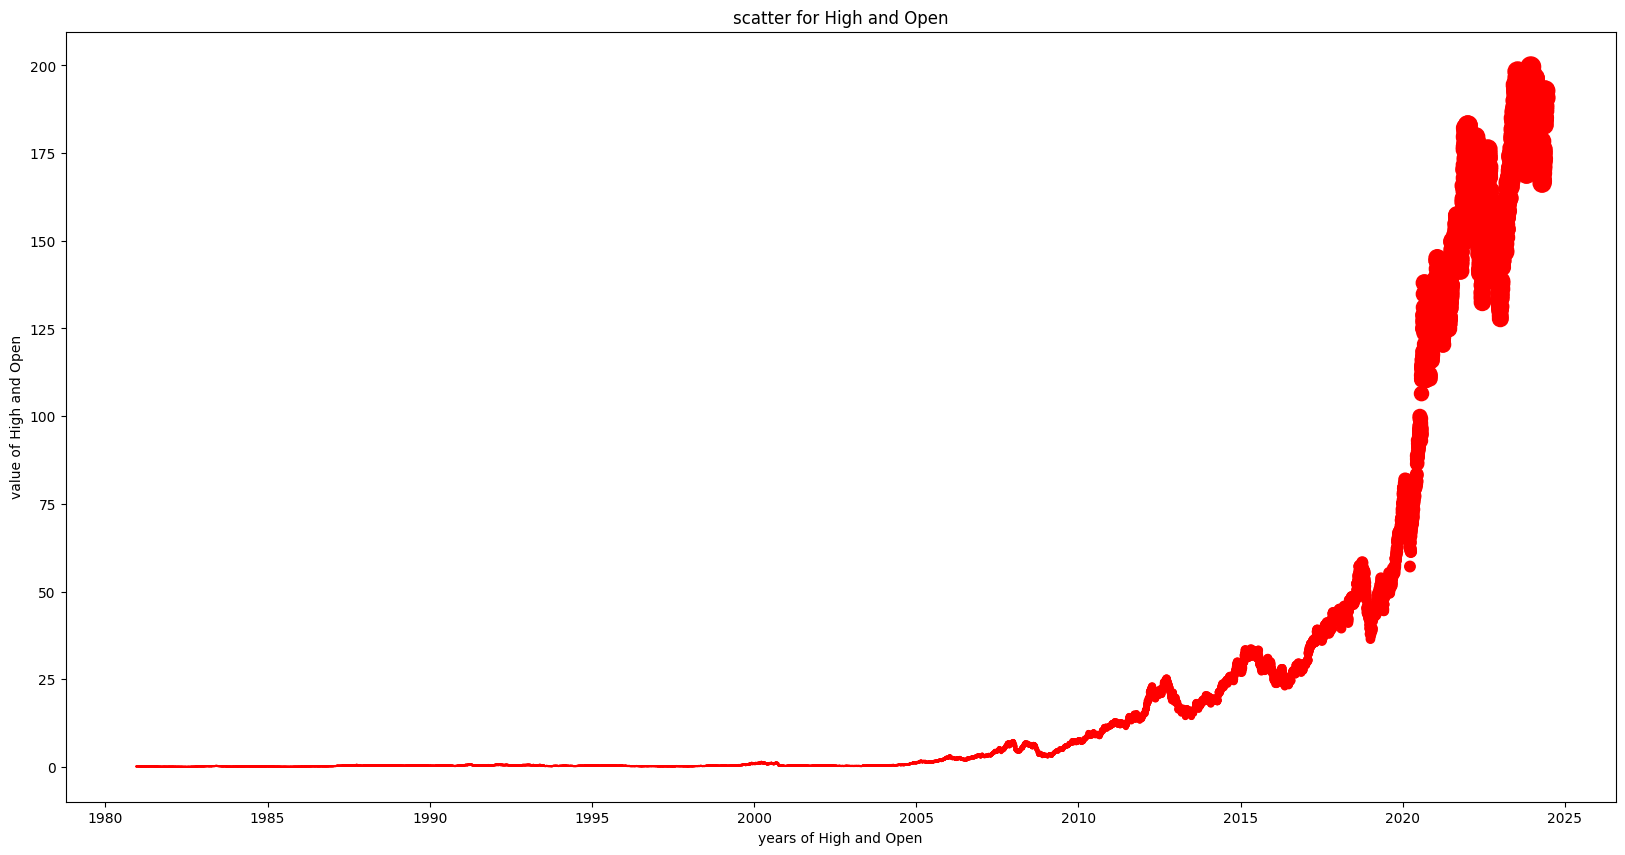

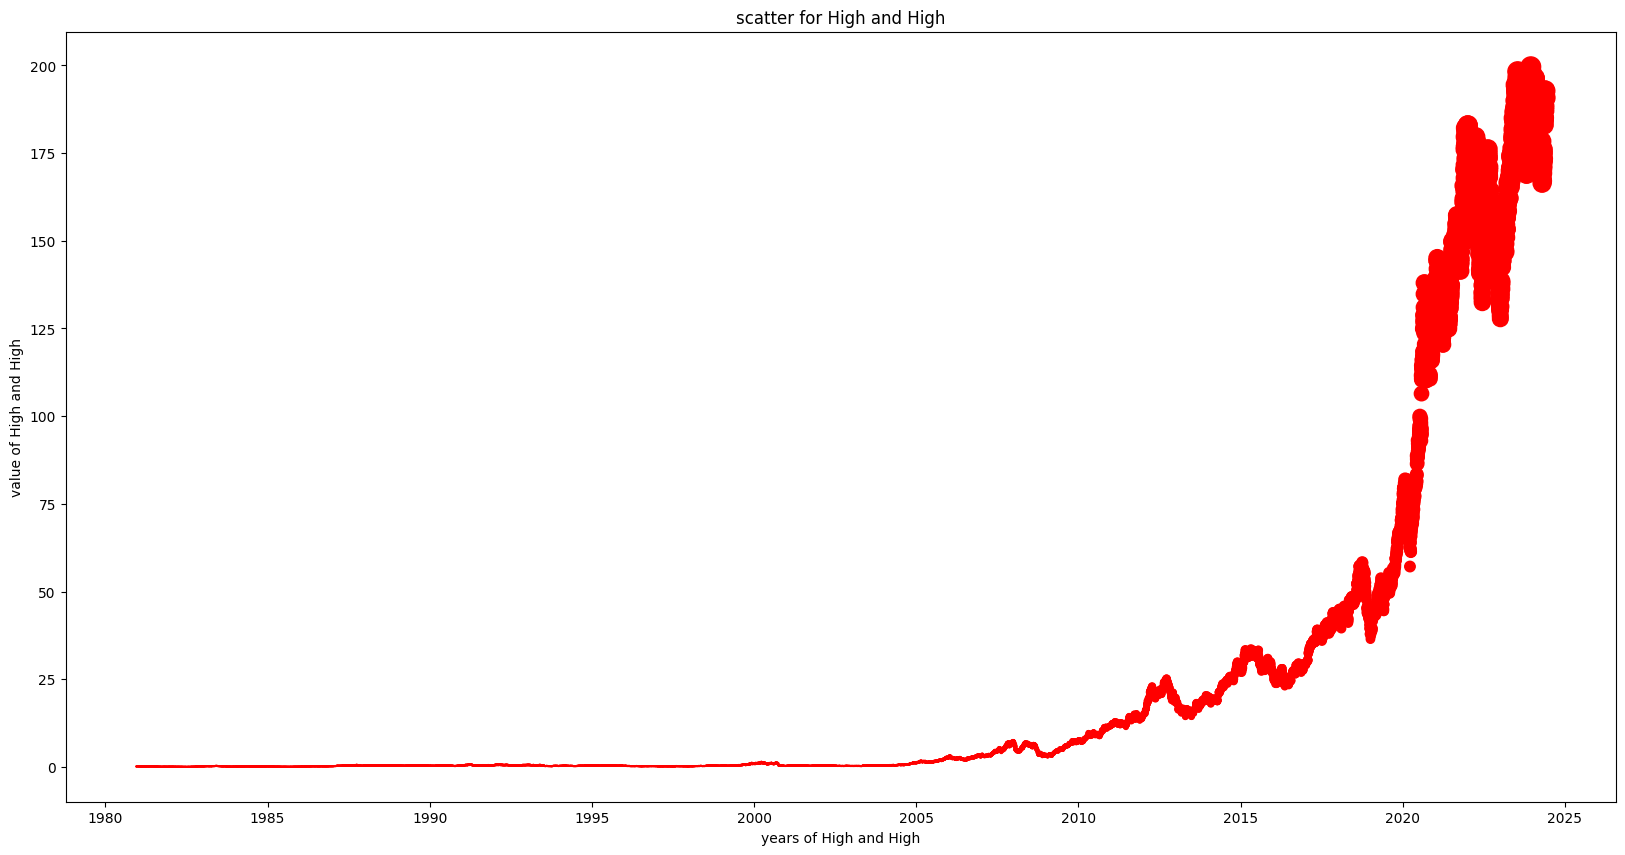

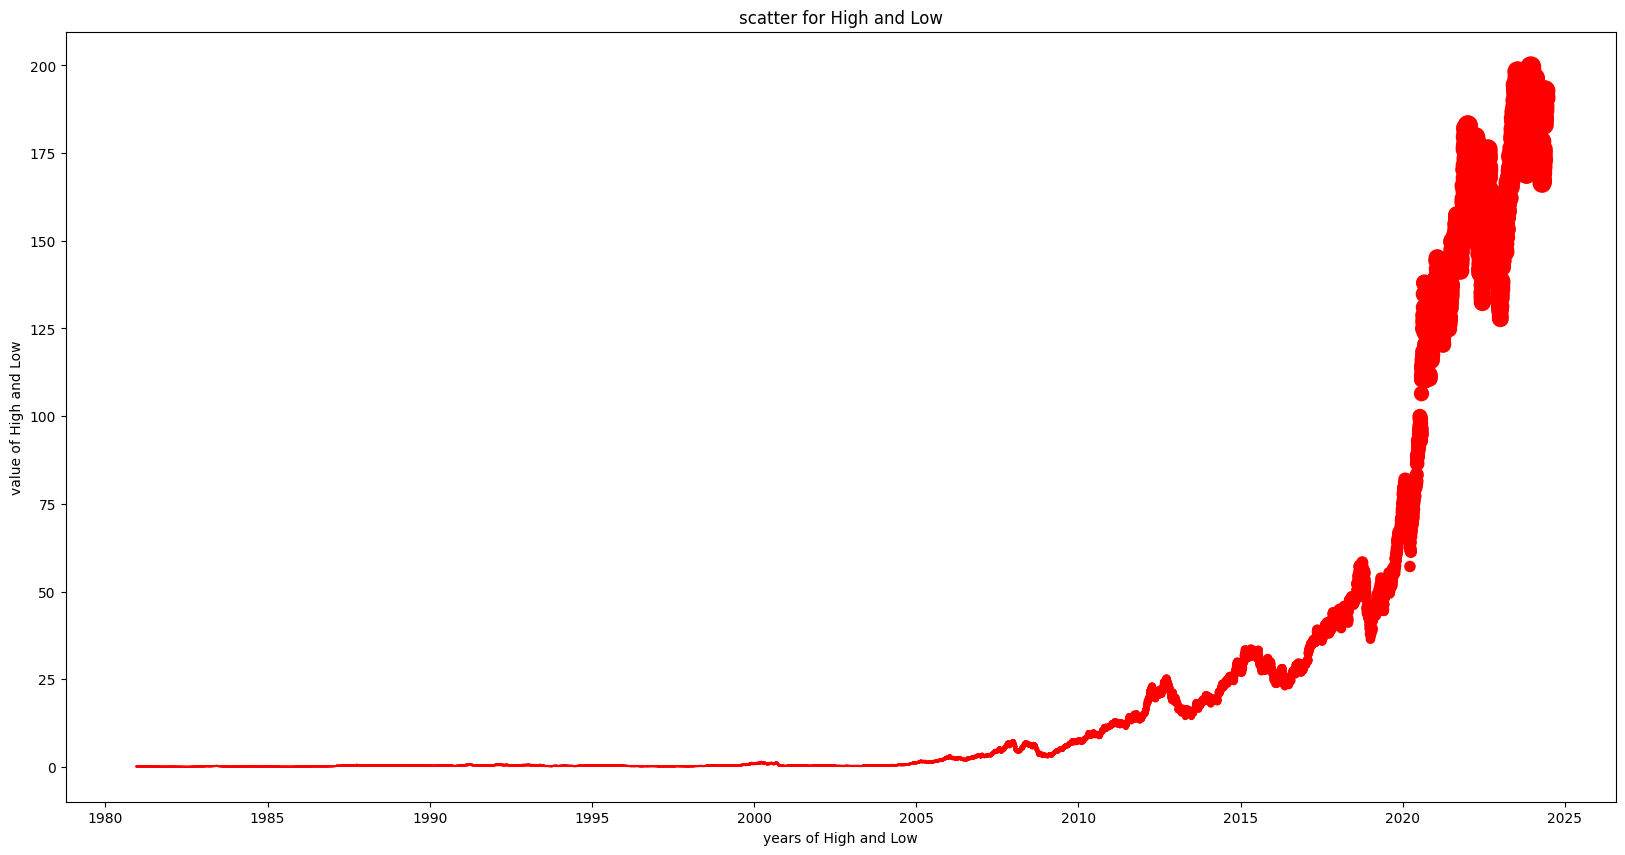

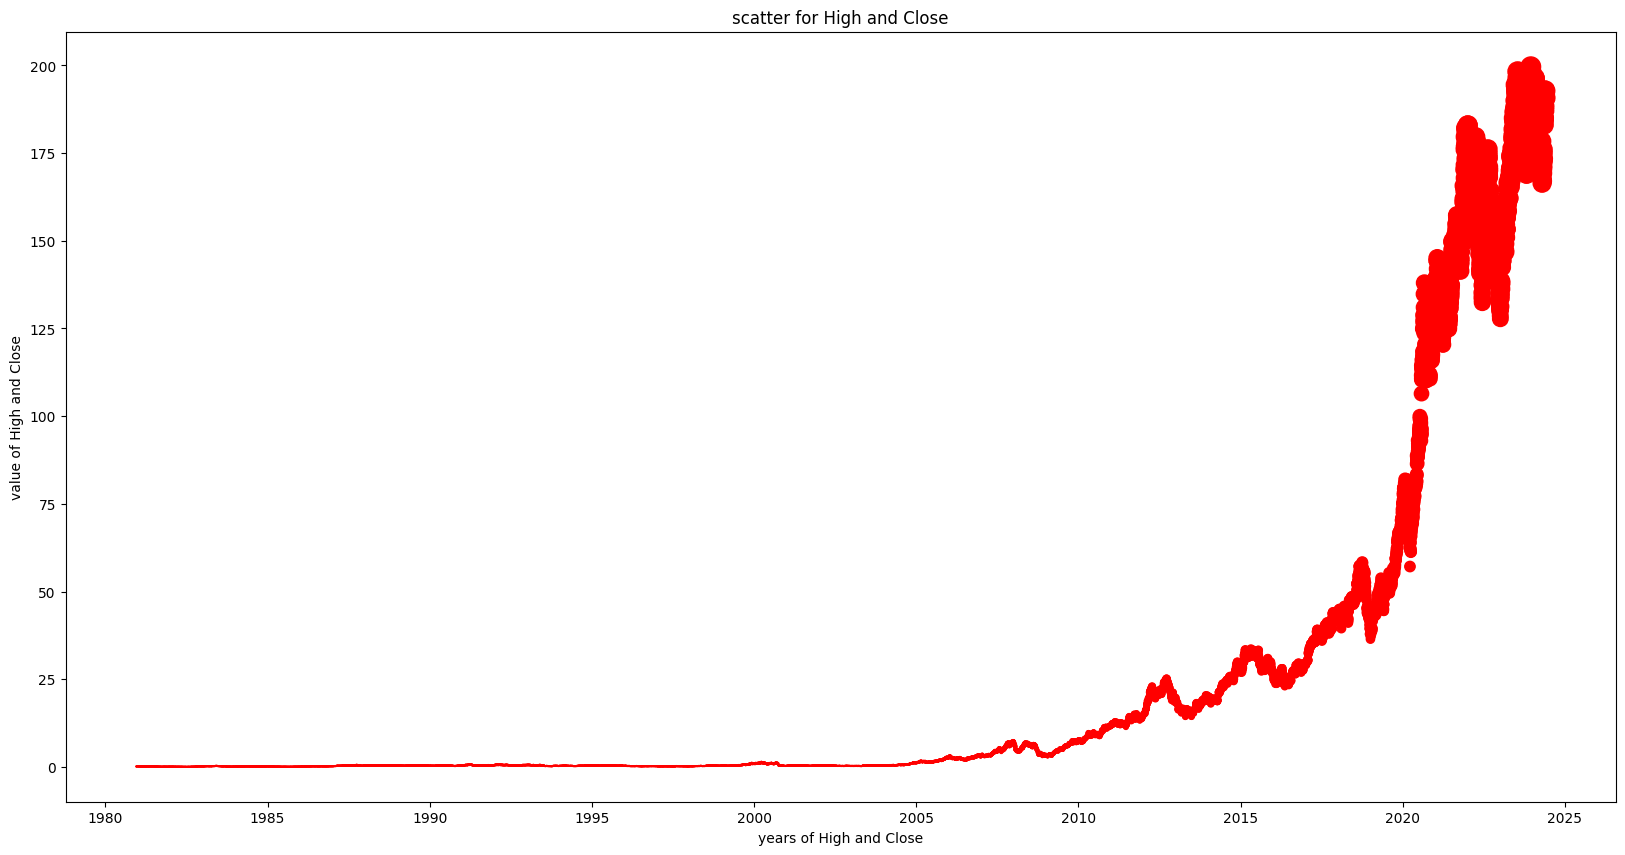

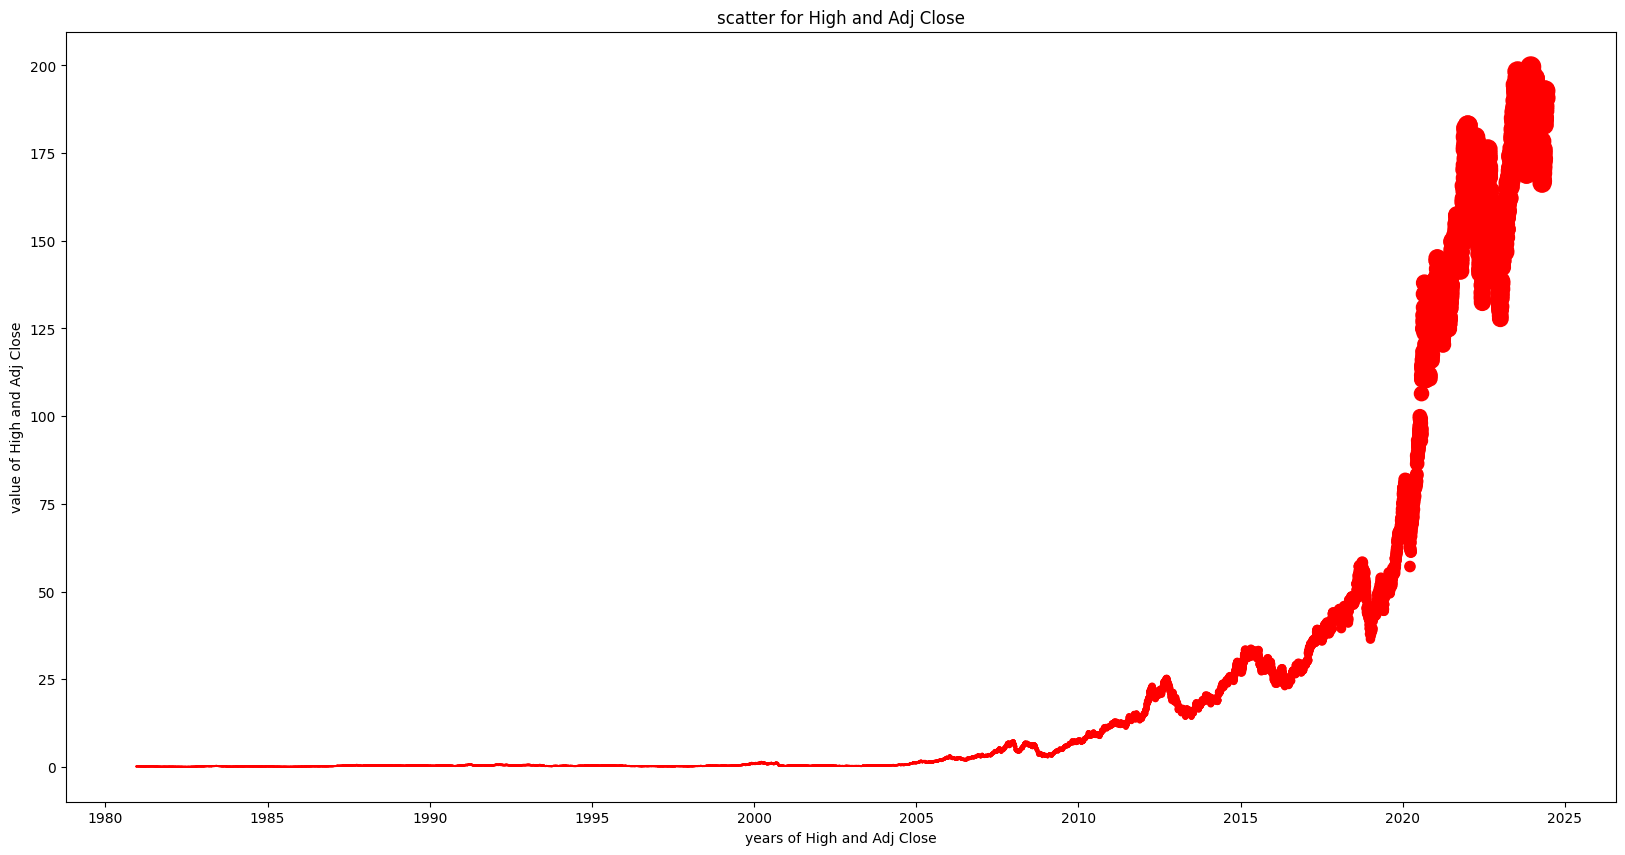

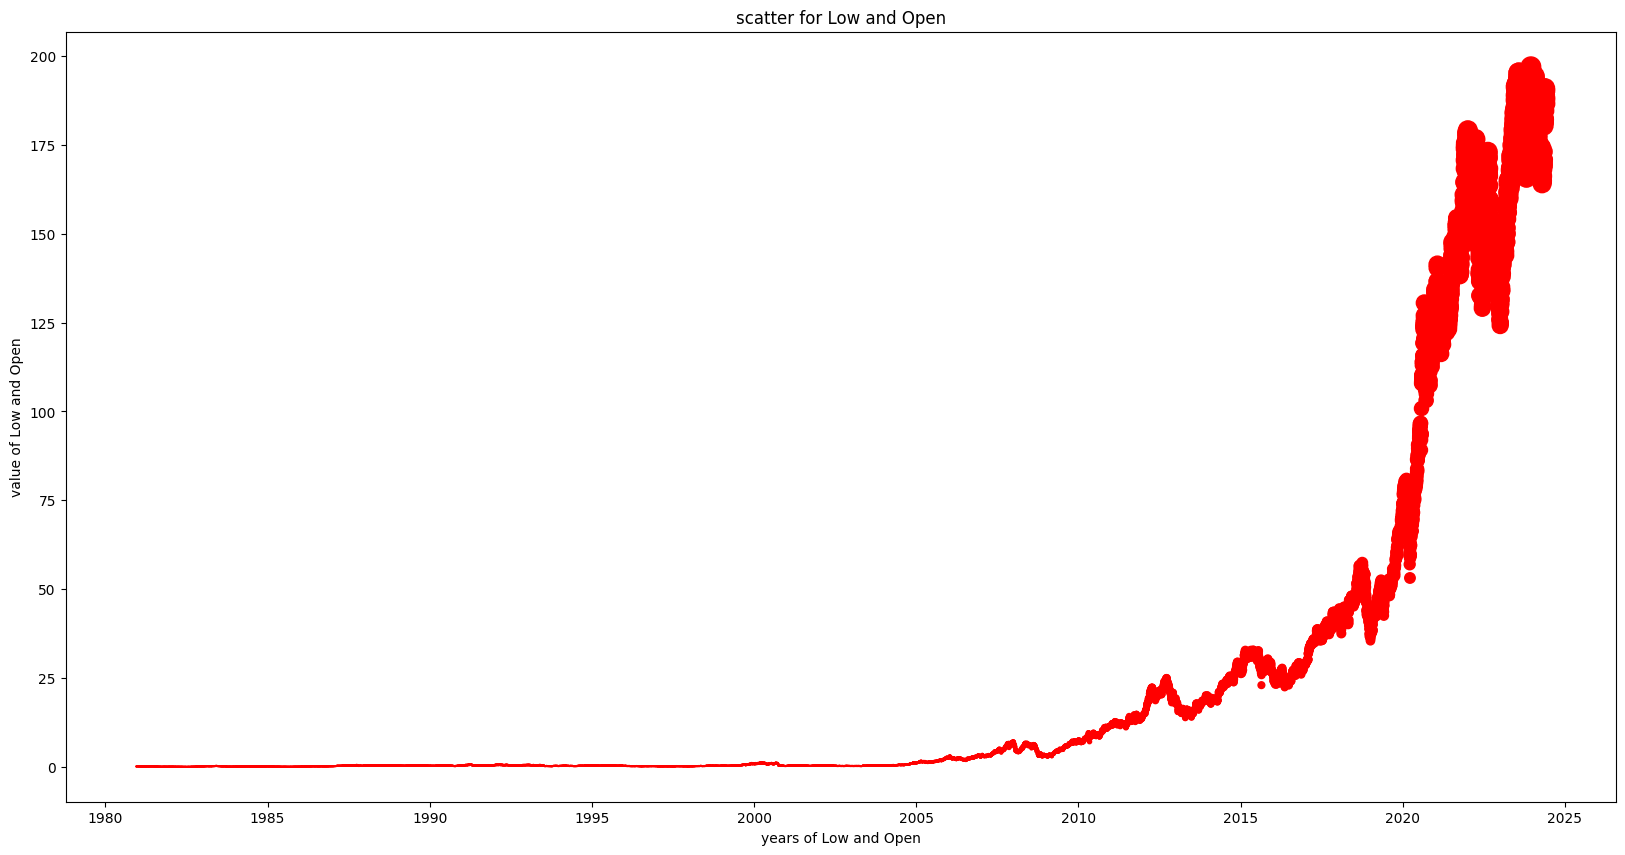

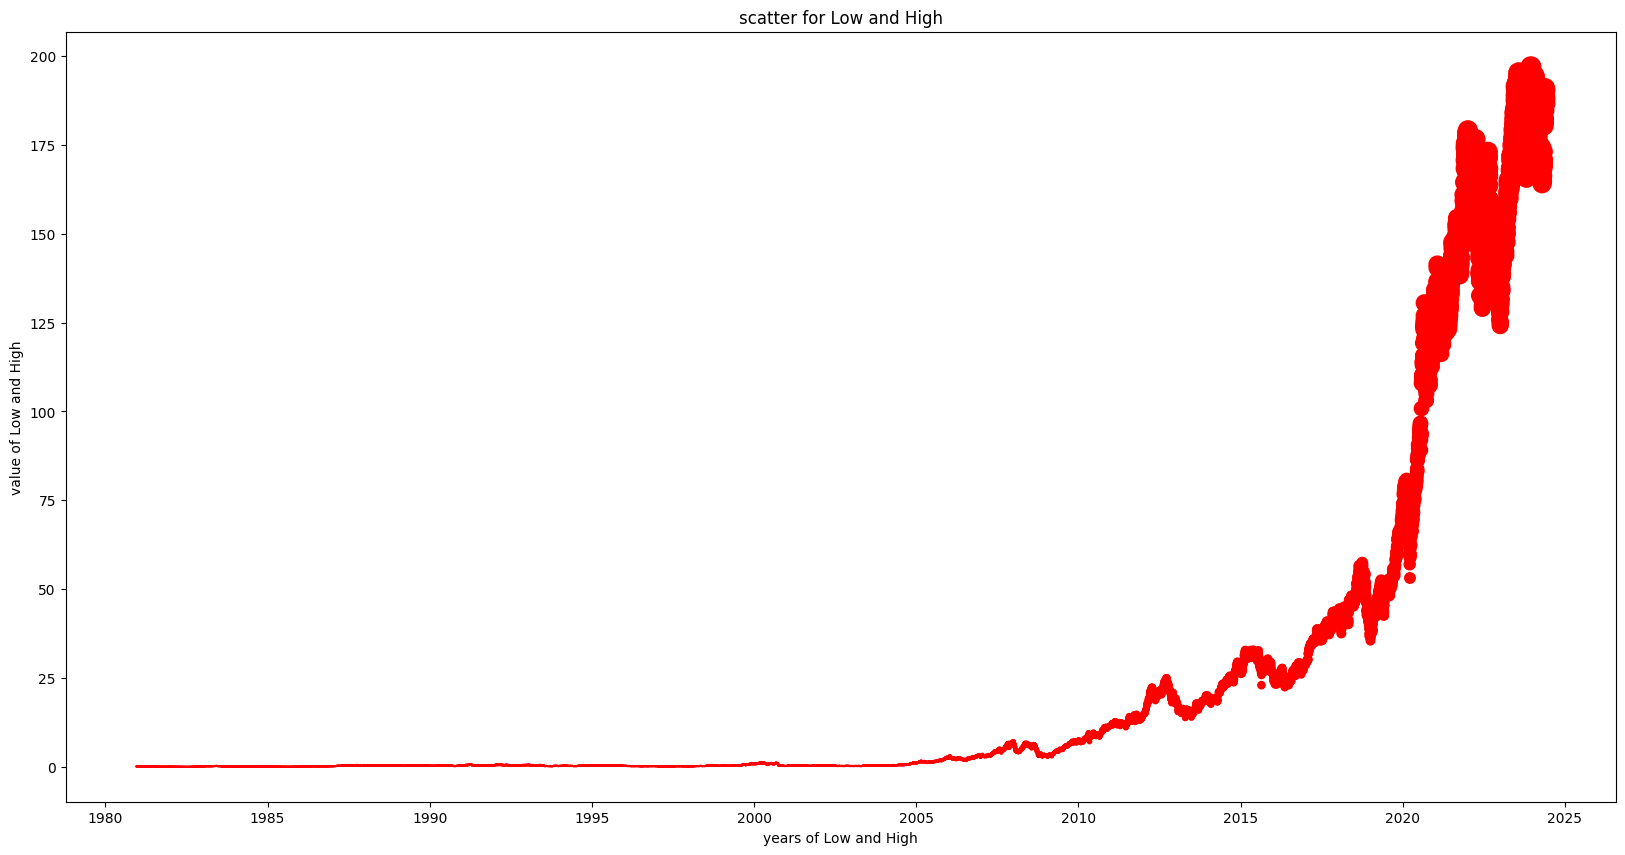

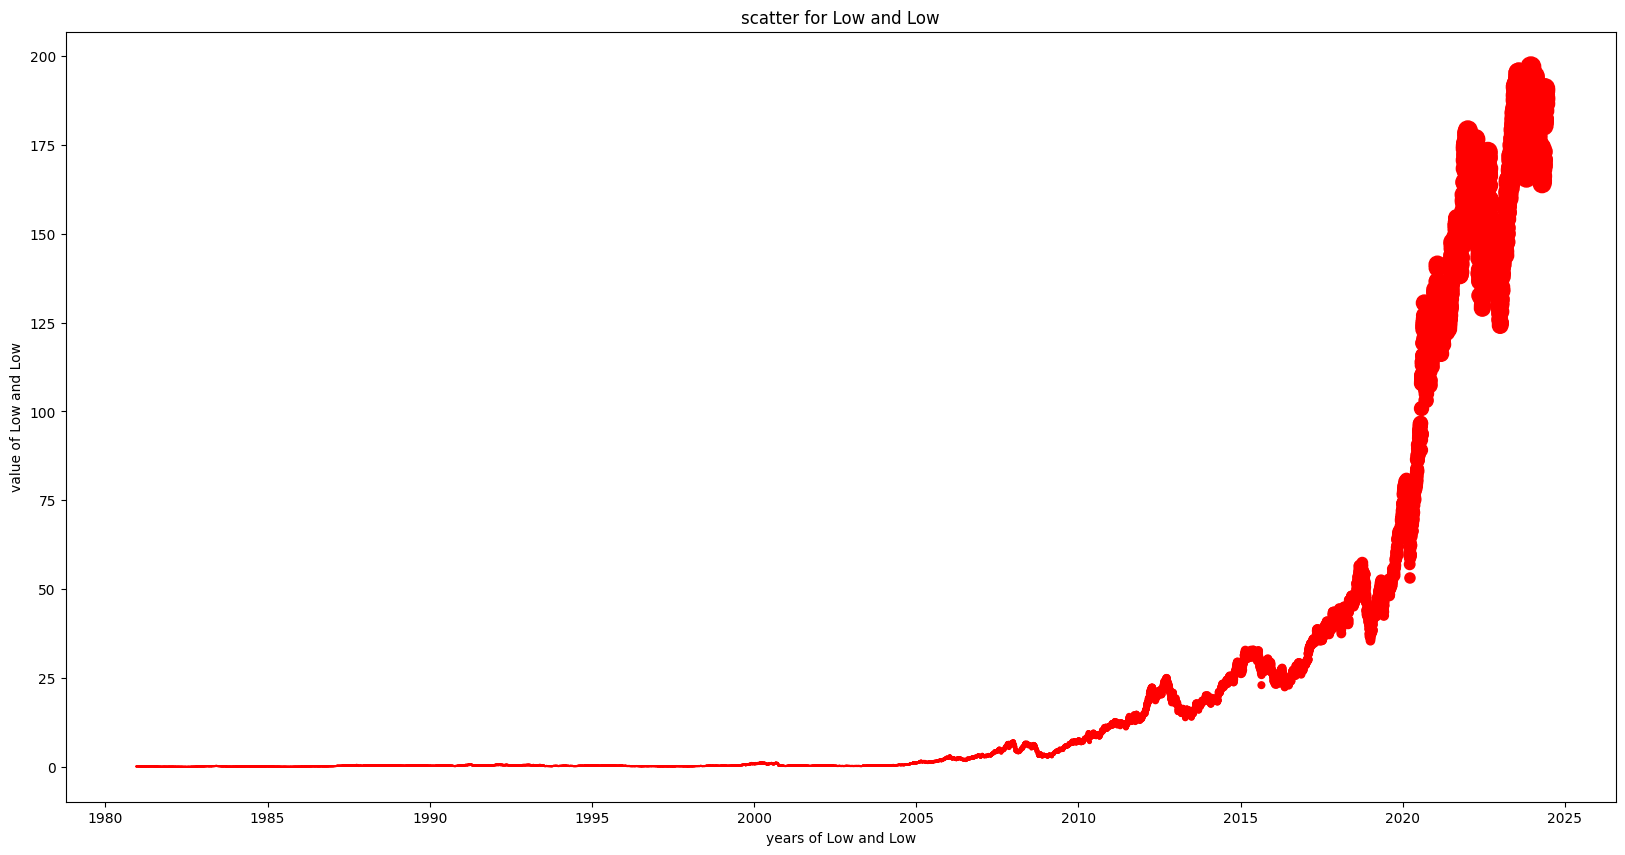

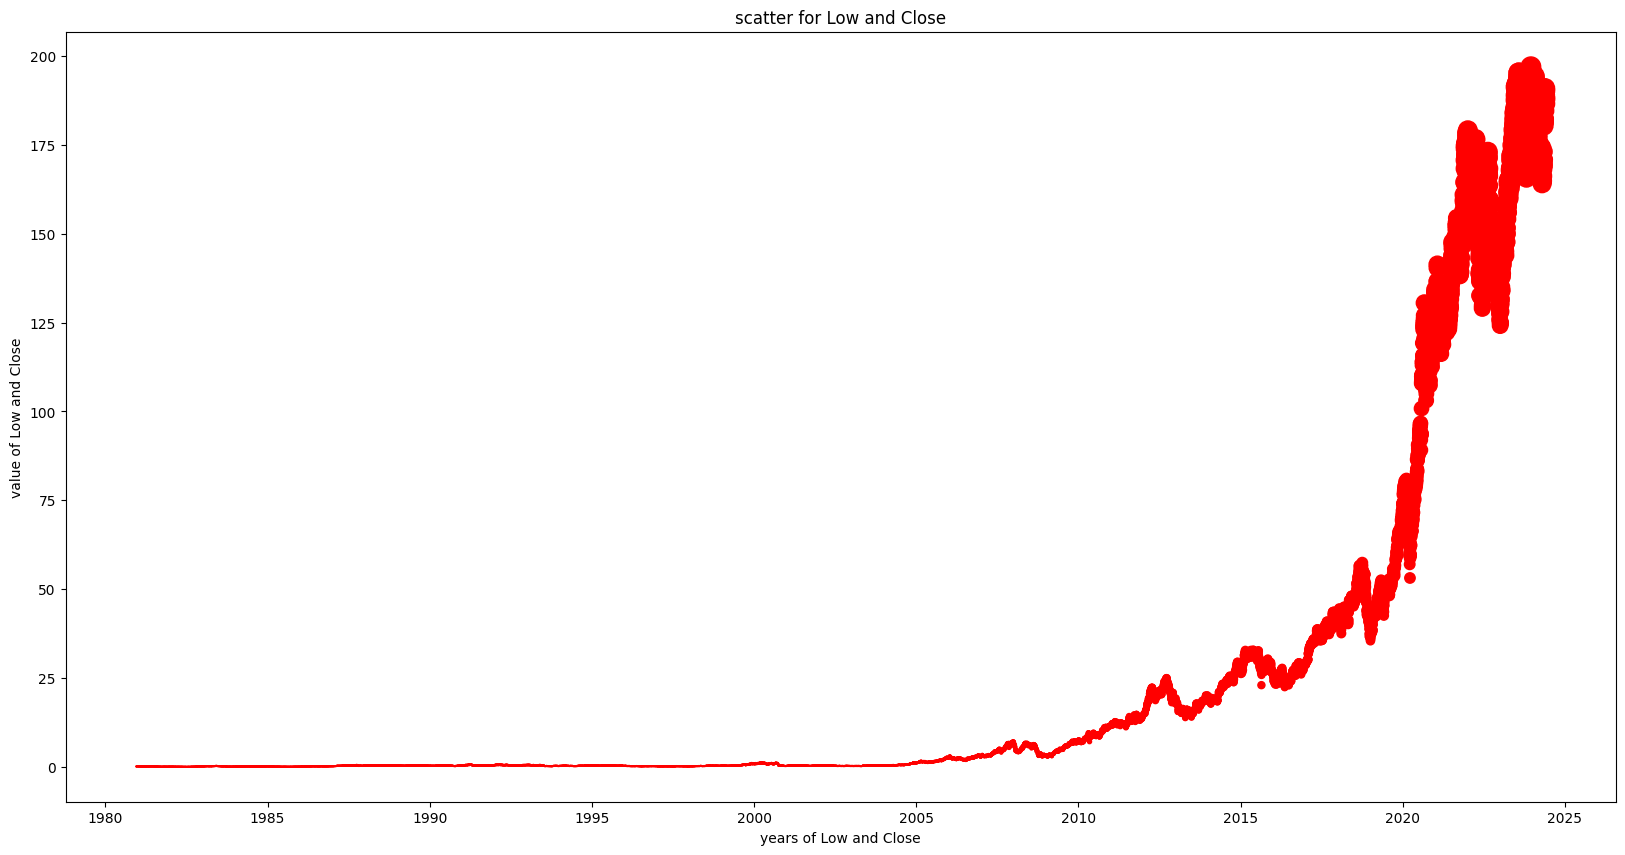

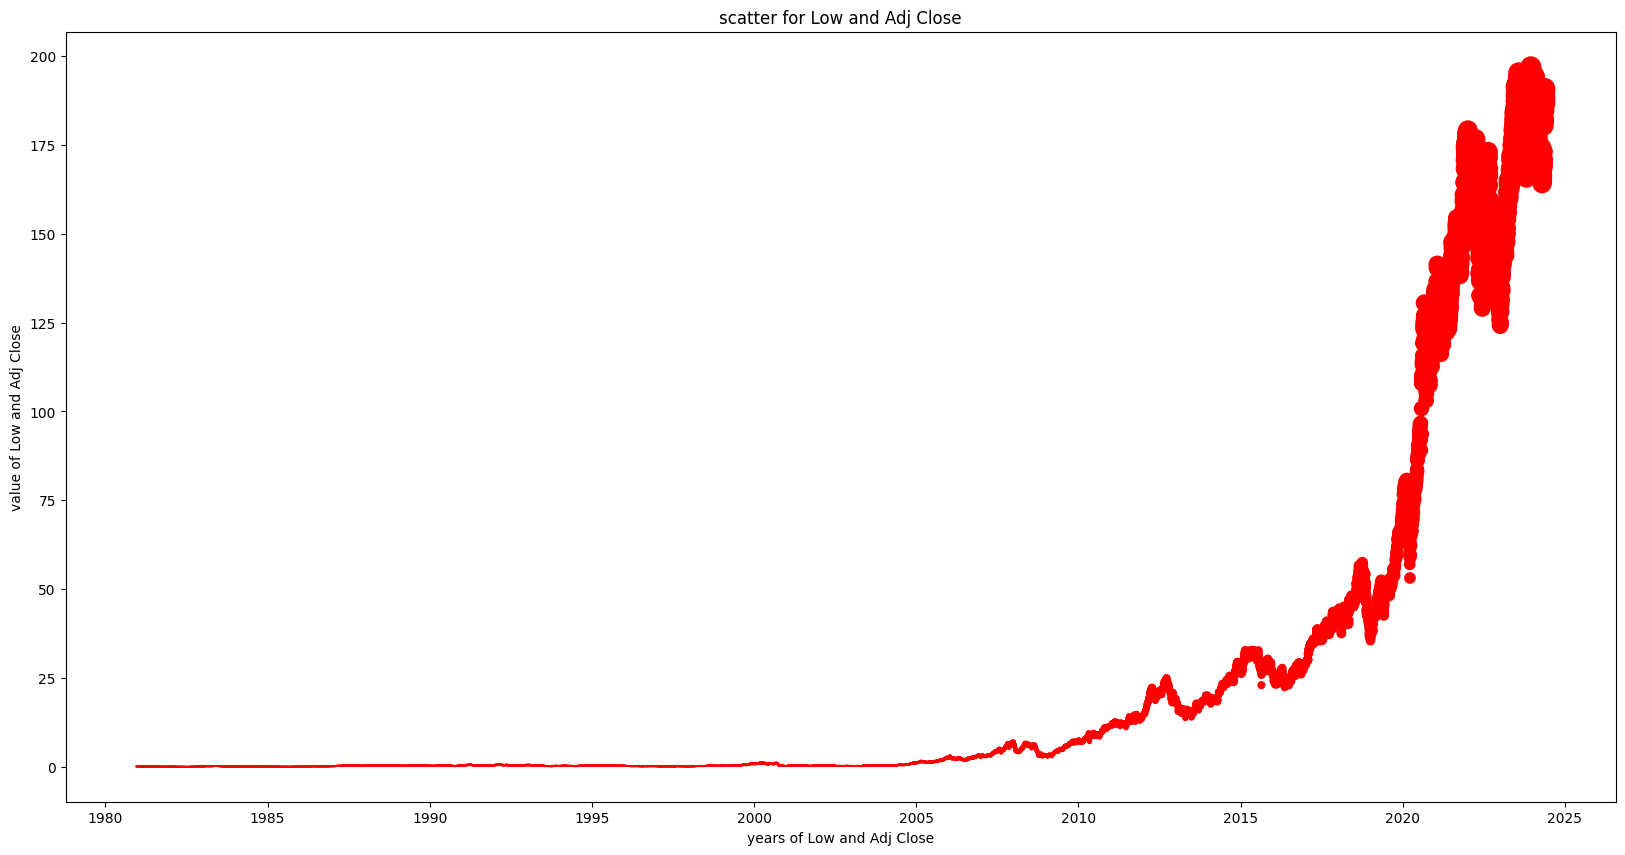

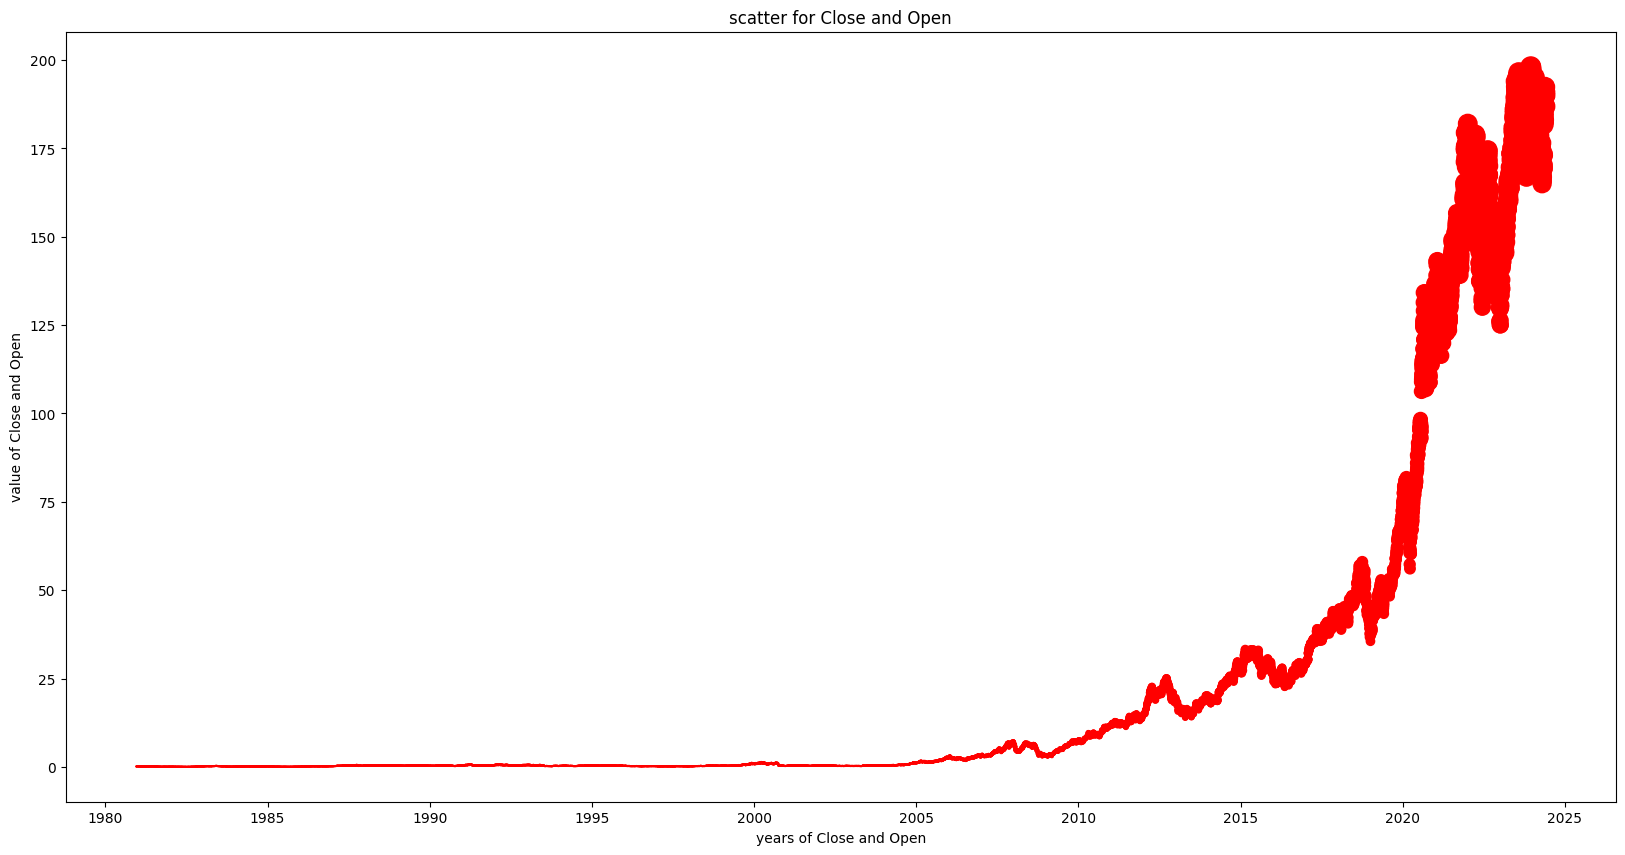

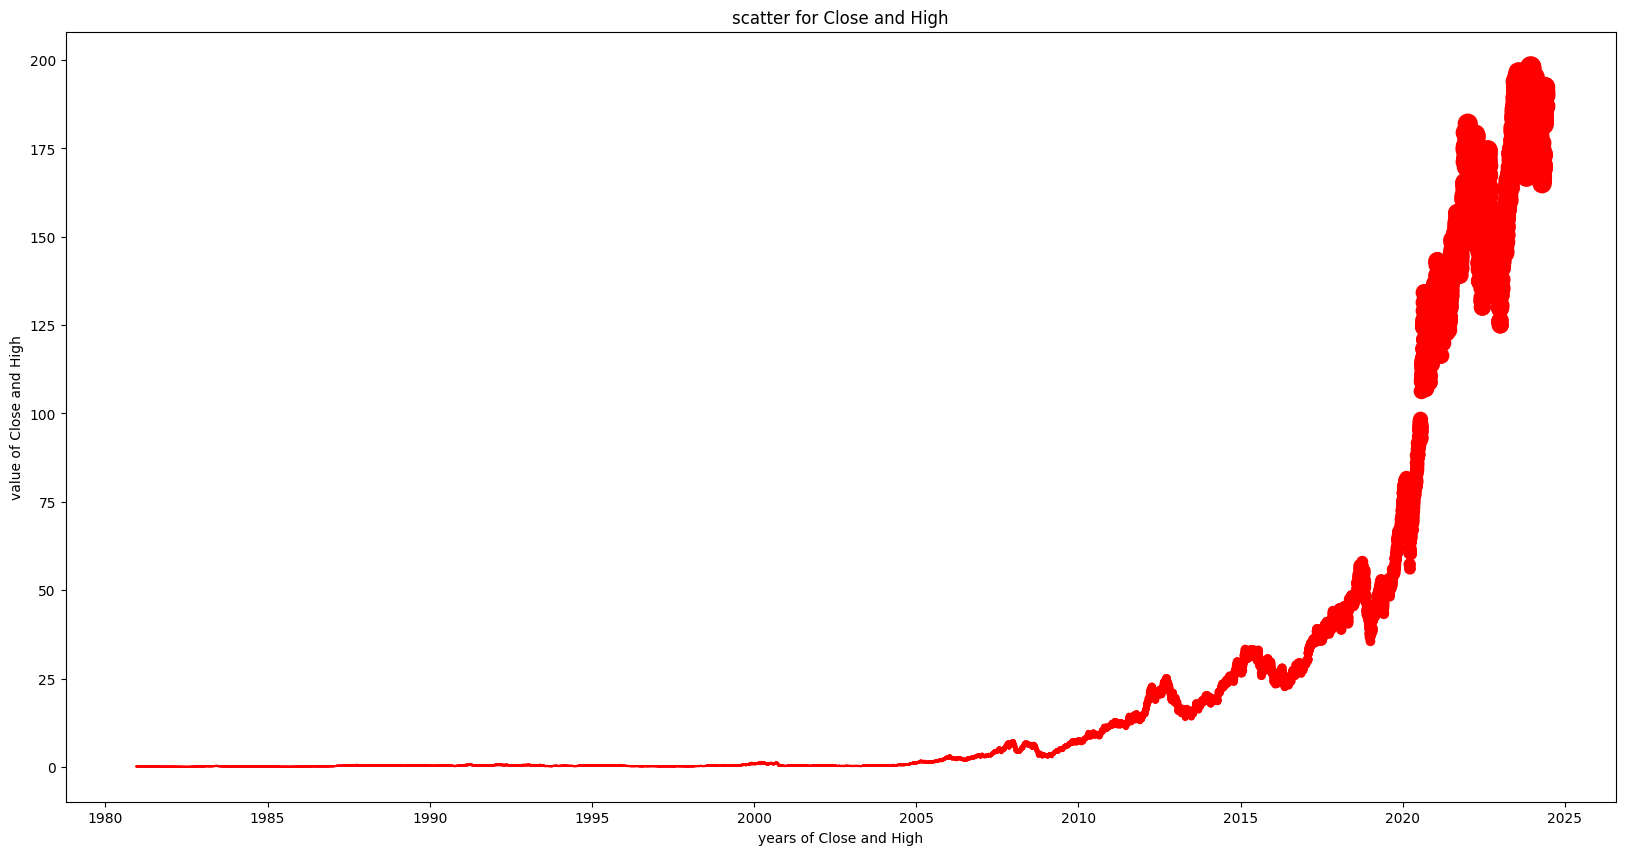

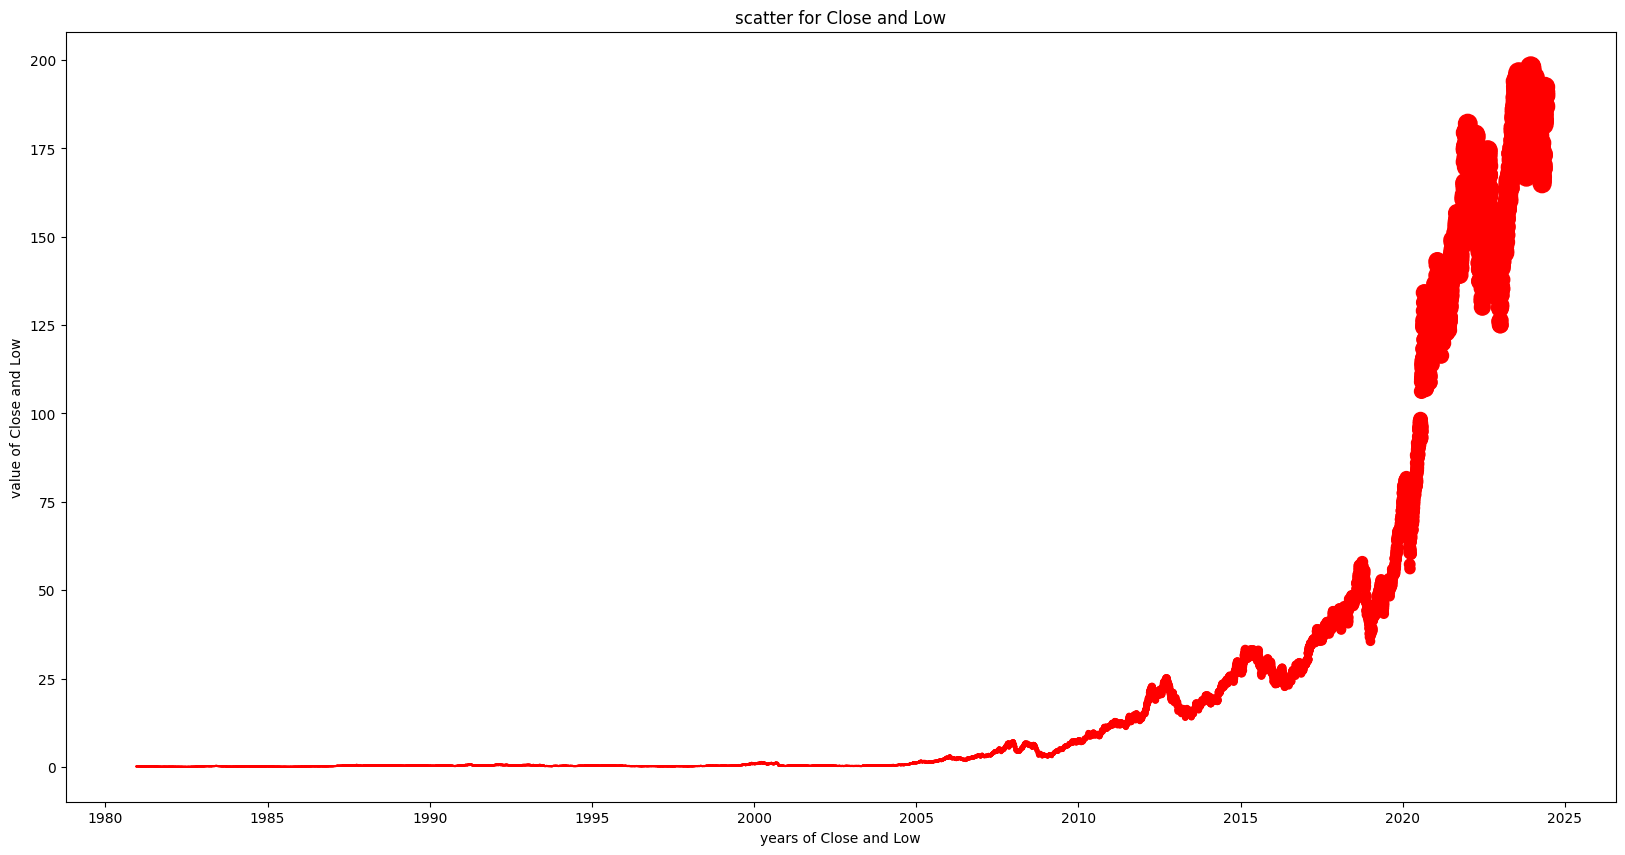

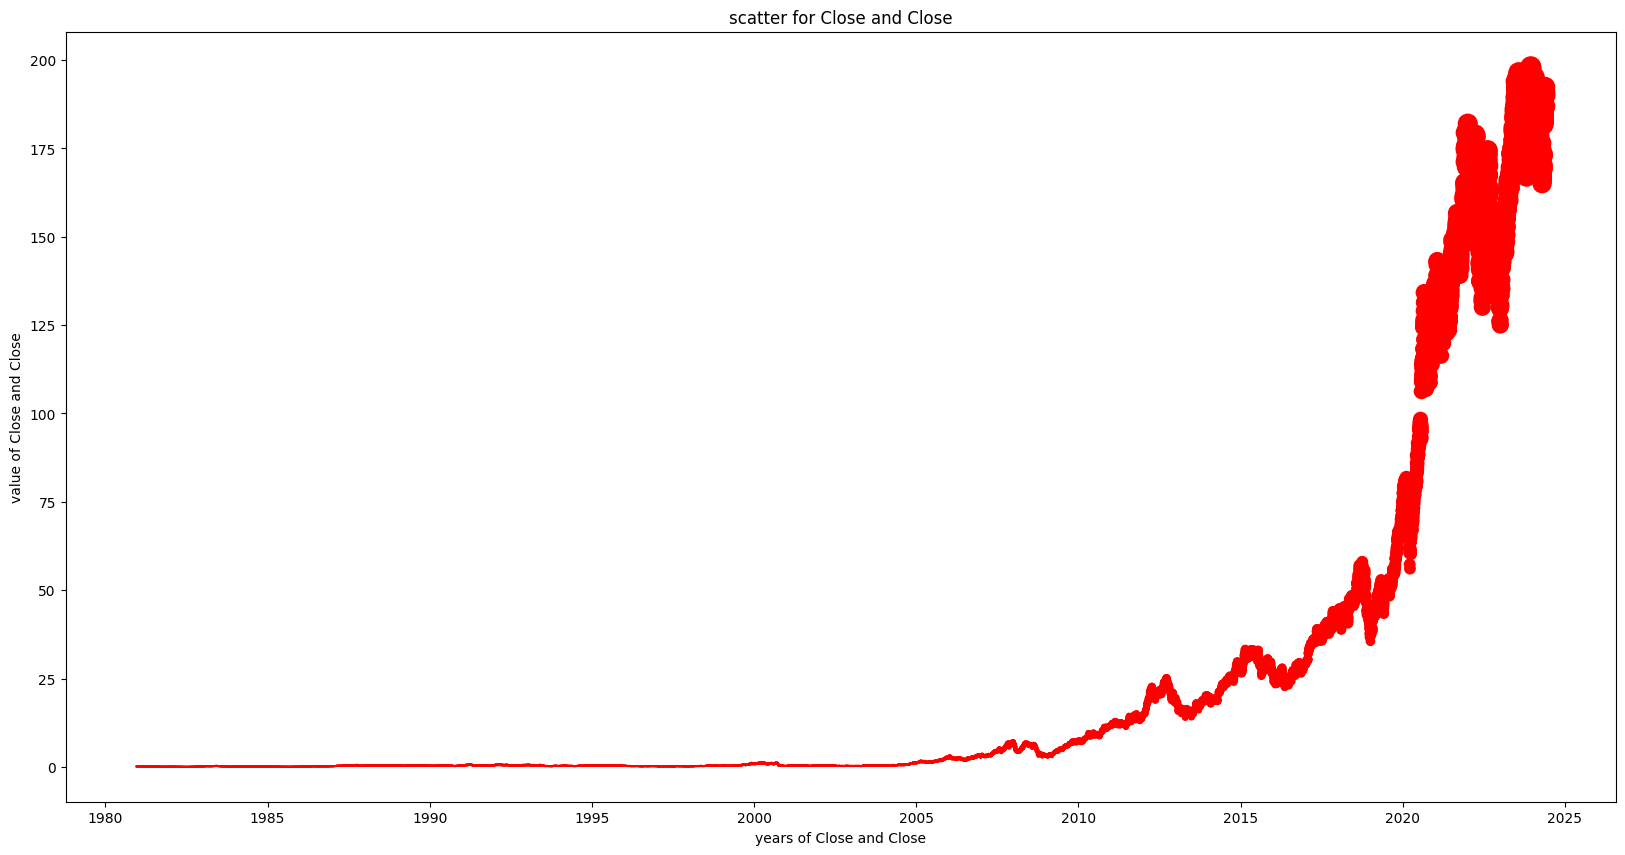

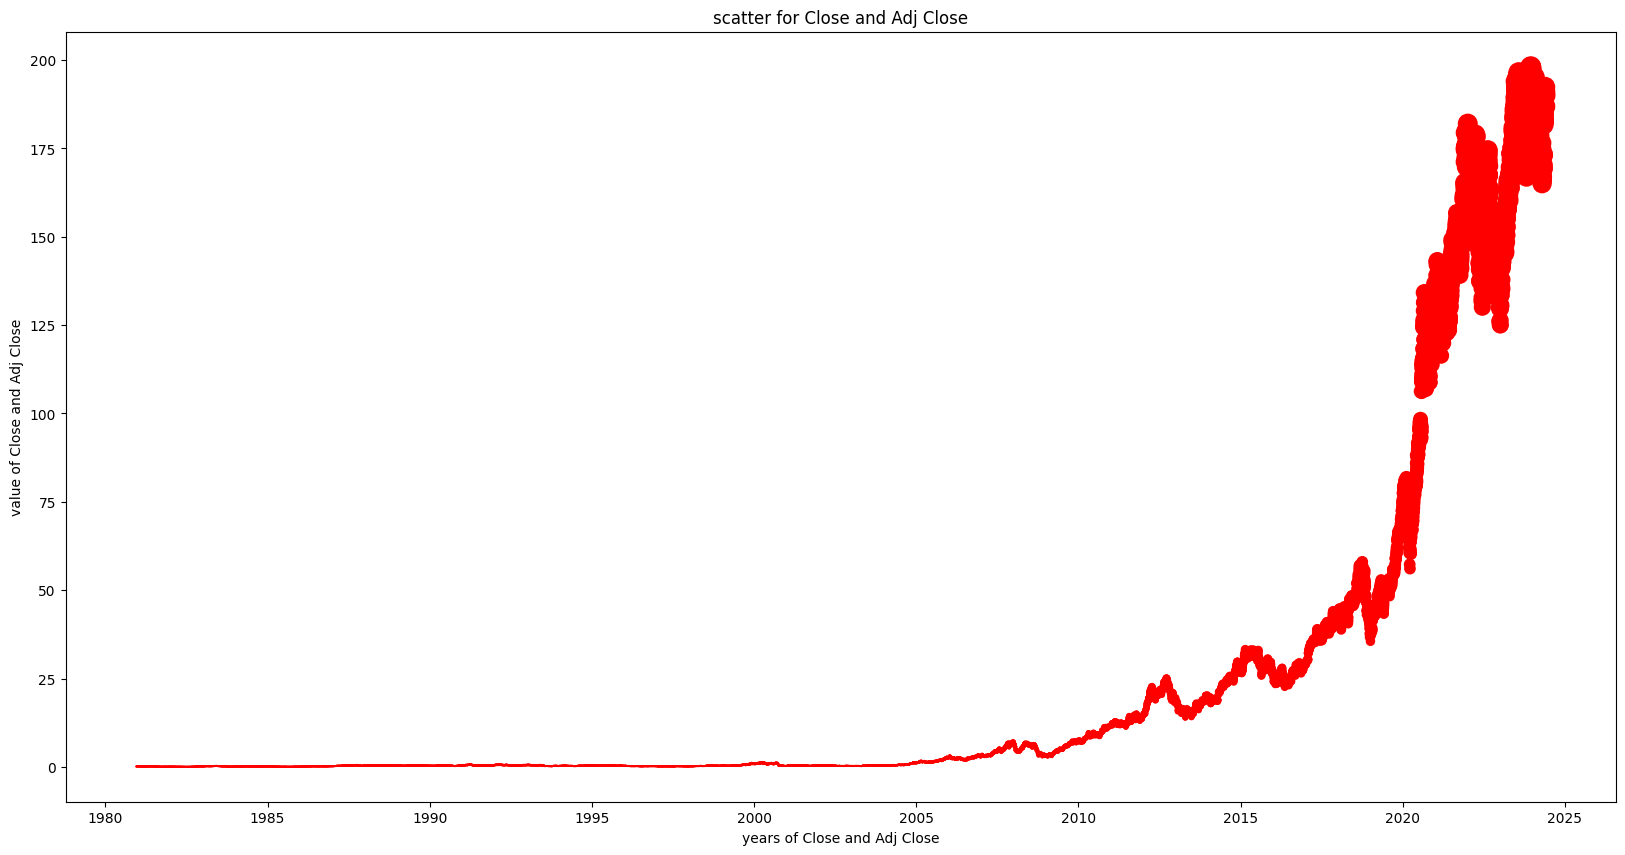

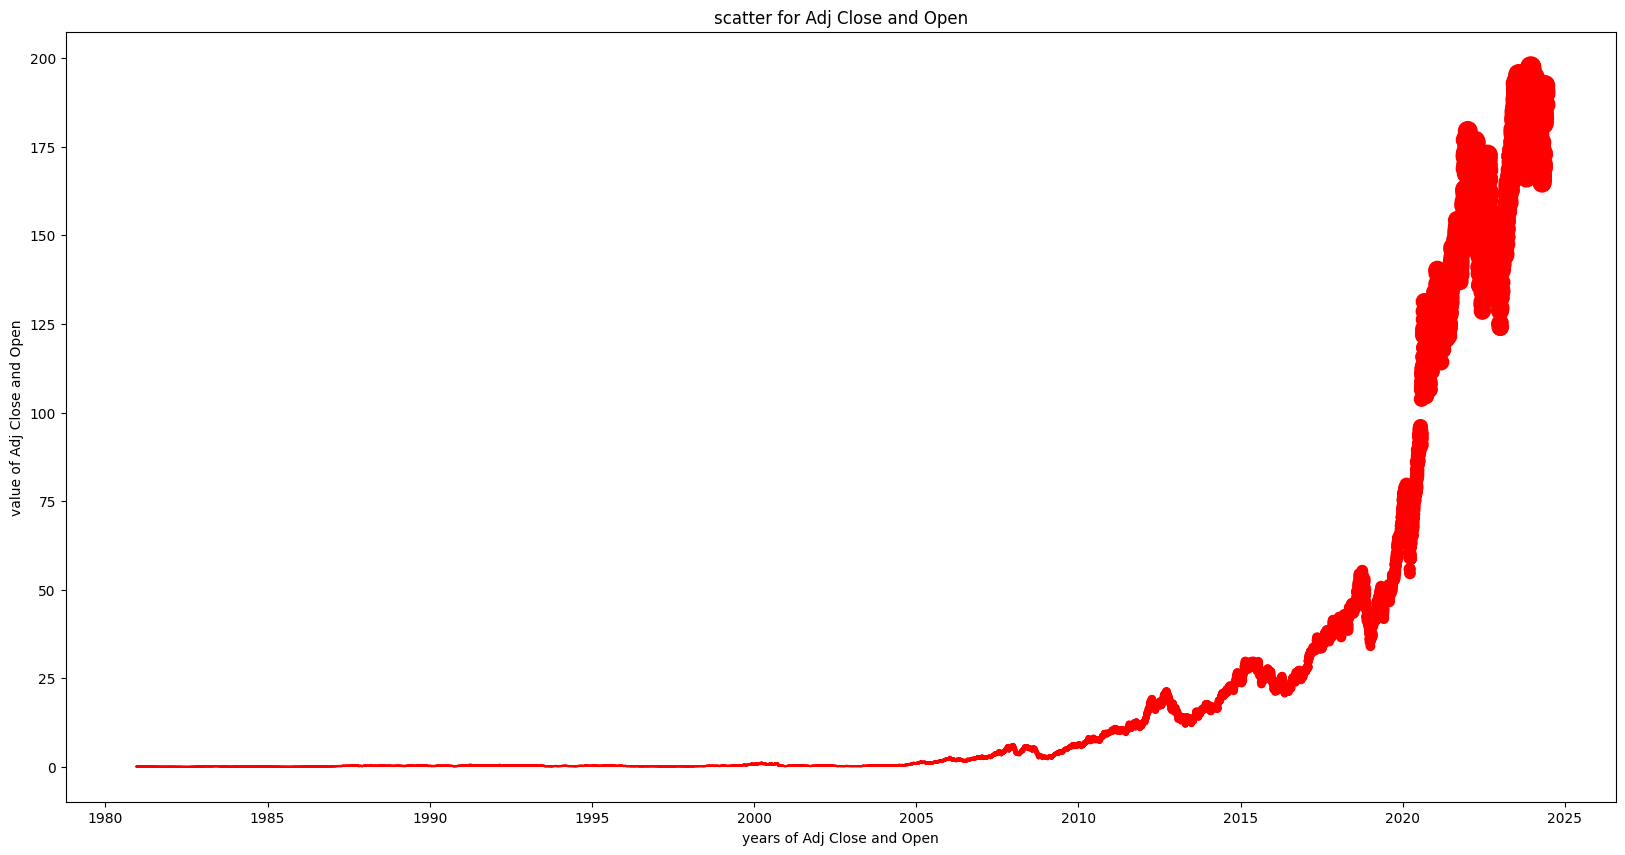

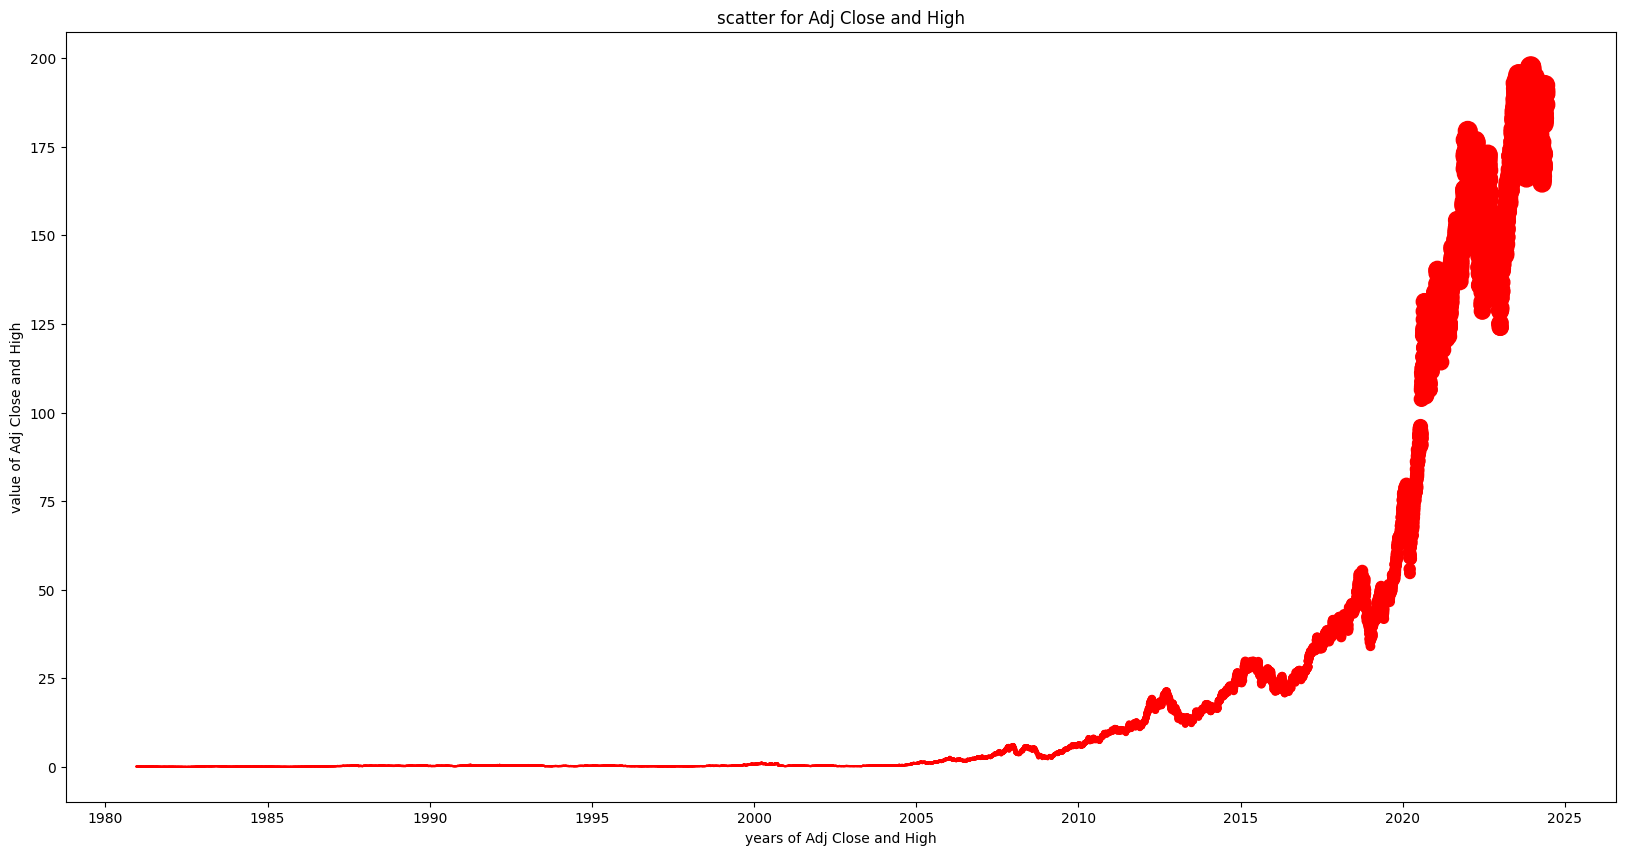

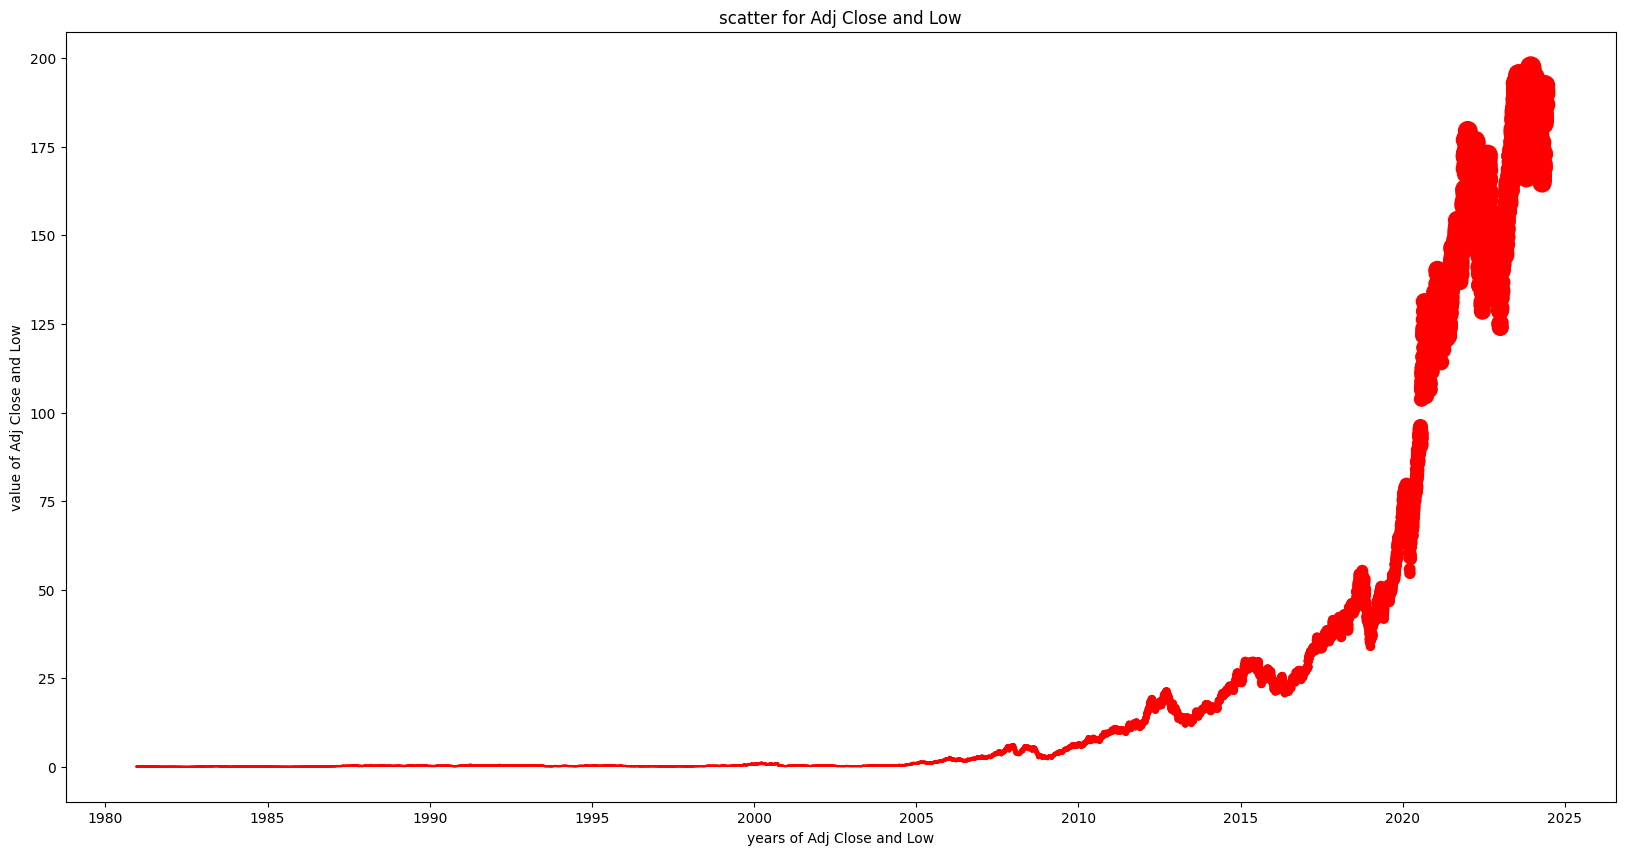

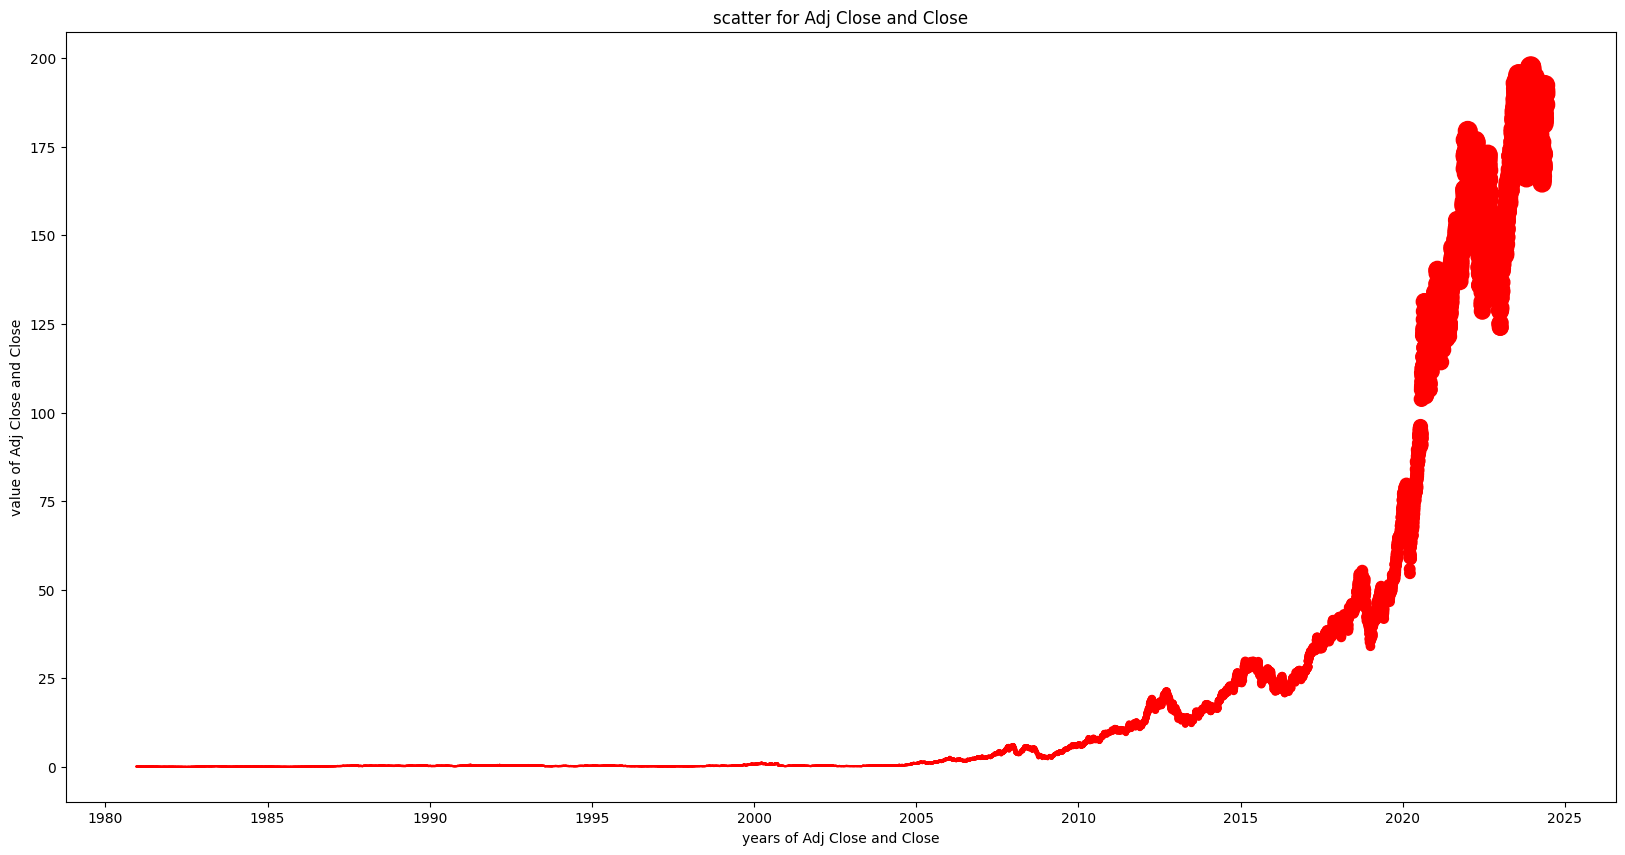

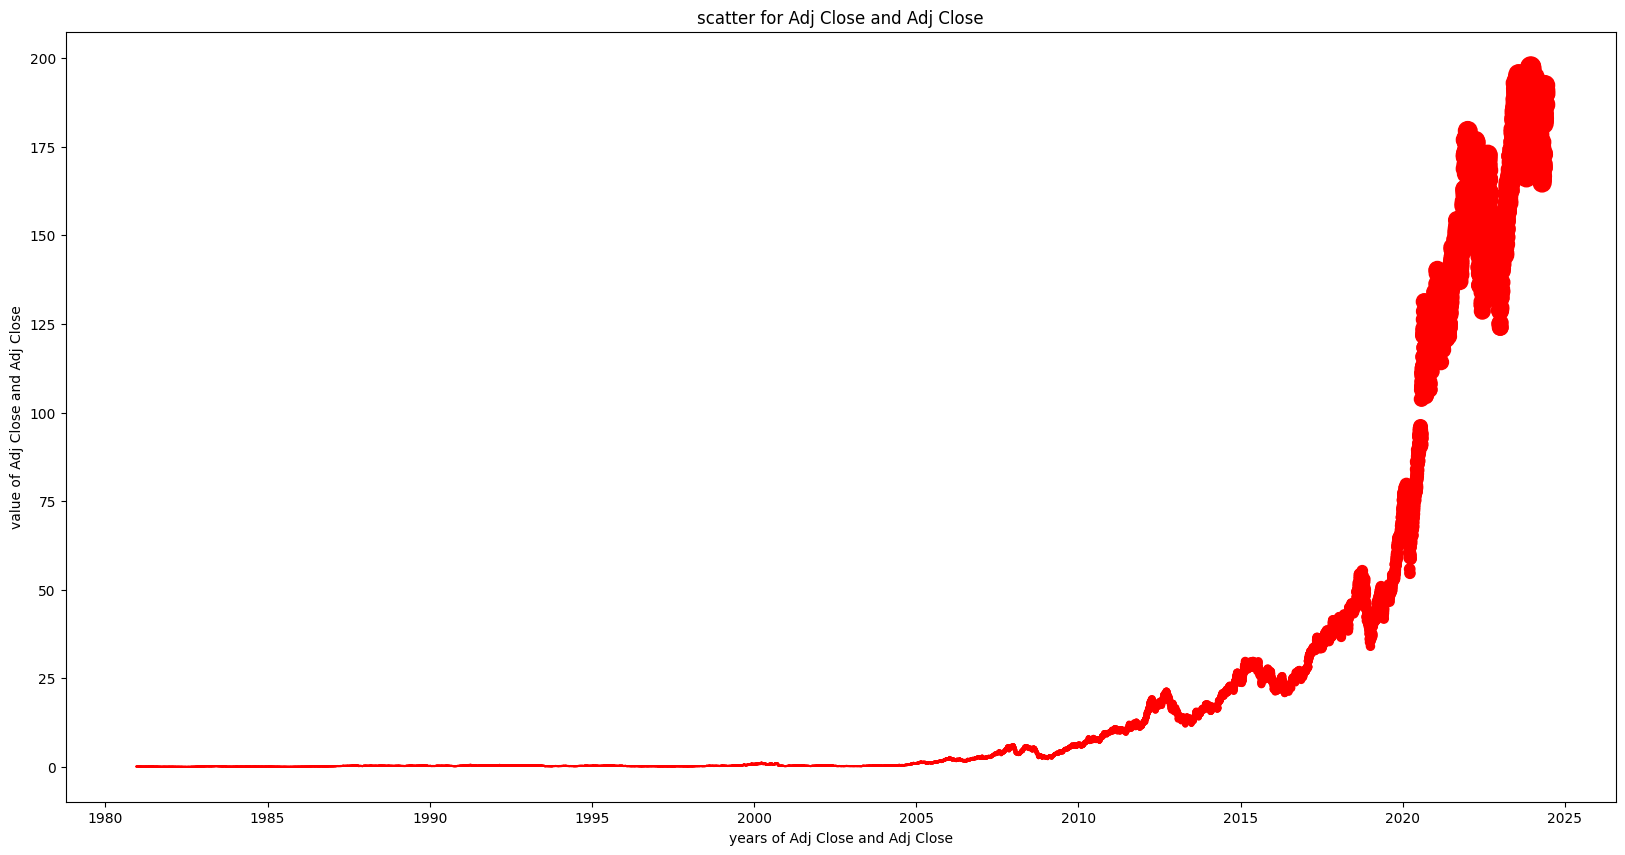

In [ ]:
def scatter_plot(df:pd.DataFrame, str1:str, str2:str):
	plt.figure(figsize=(20, 10))
	plt.title(f"scatter for {str1} and {str2}")
	plt.scatter(df["Date"], df[str1], df[str2], color="red")
	plt.xlabel(f"years of {str1} and {str2}")
	plt.ylabel(f"value of {str1} and {str2}")
	plt.show()
for i in df.columns:
	for j in df.columns:
		if i!= "Date" and  j!= "Date" and i!="Volume" and j!= "Volume" and i!=j:
			scatter_plot(df, i, j)

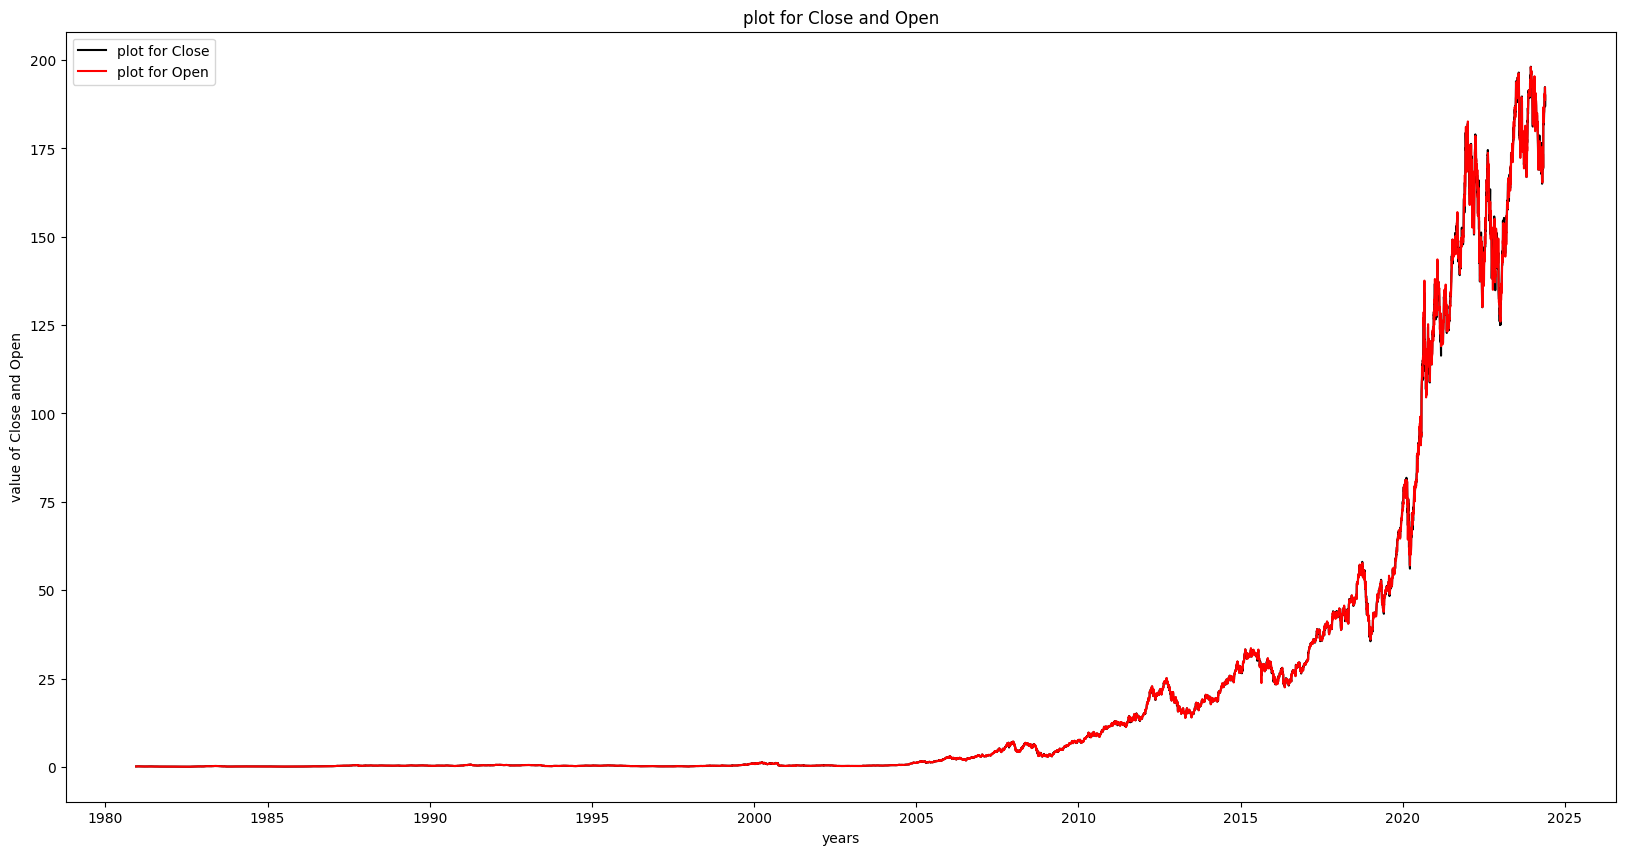

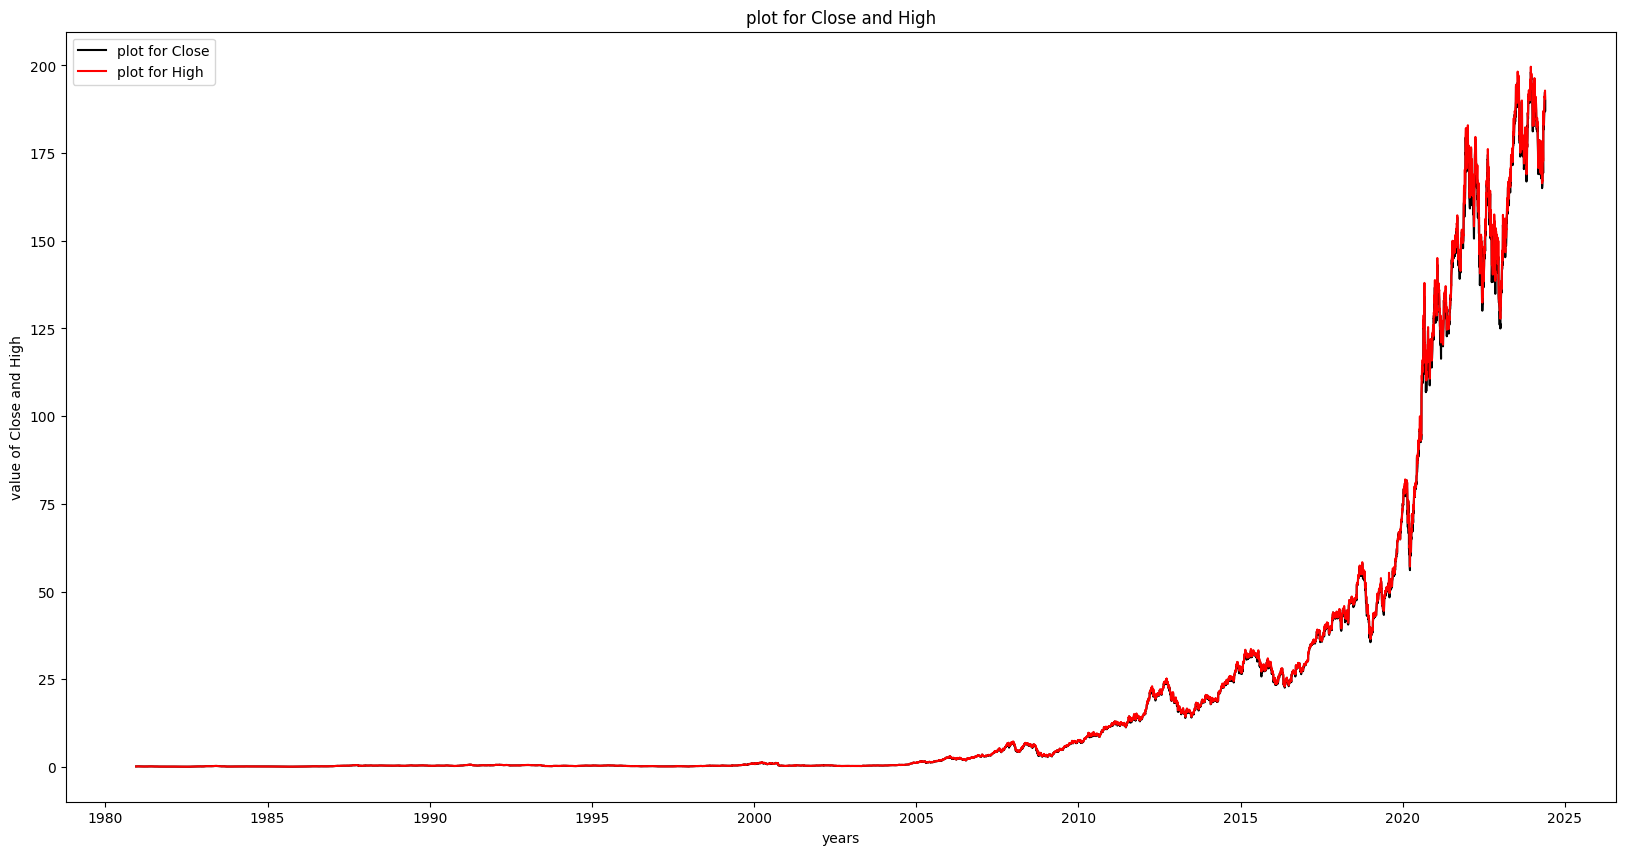

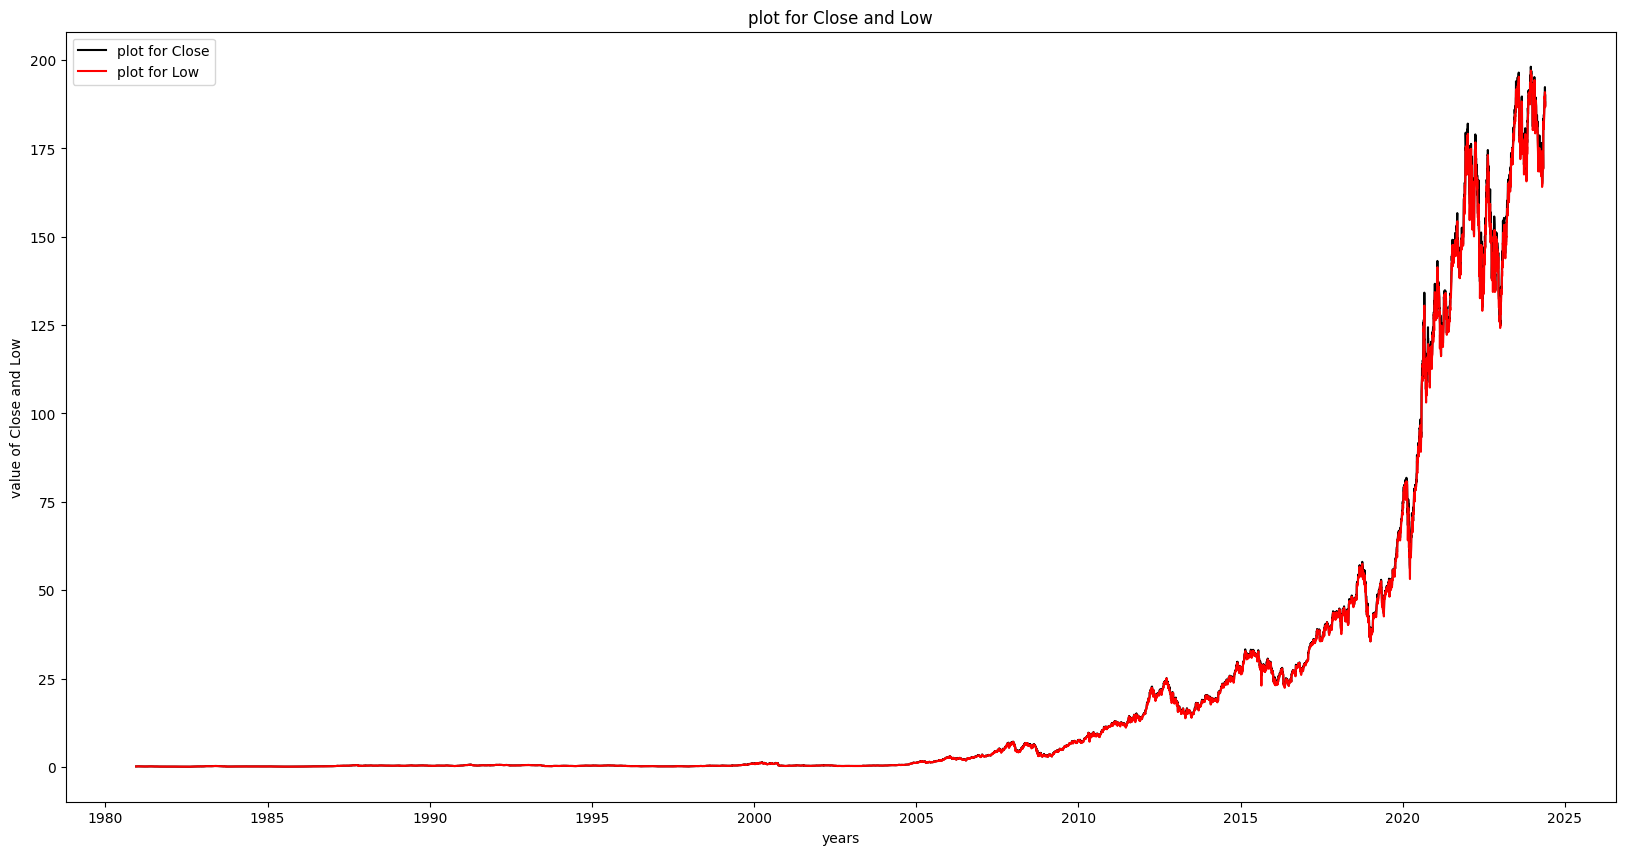

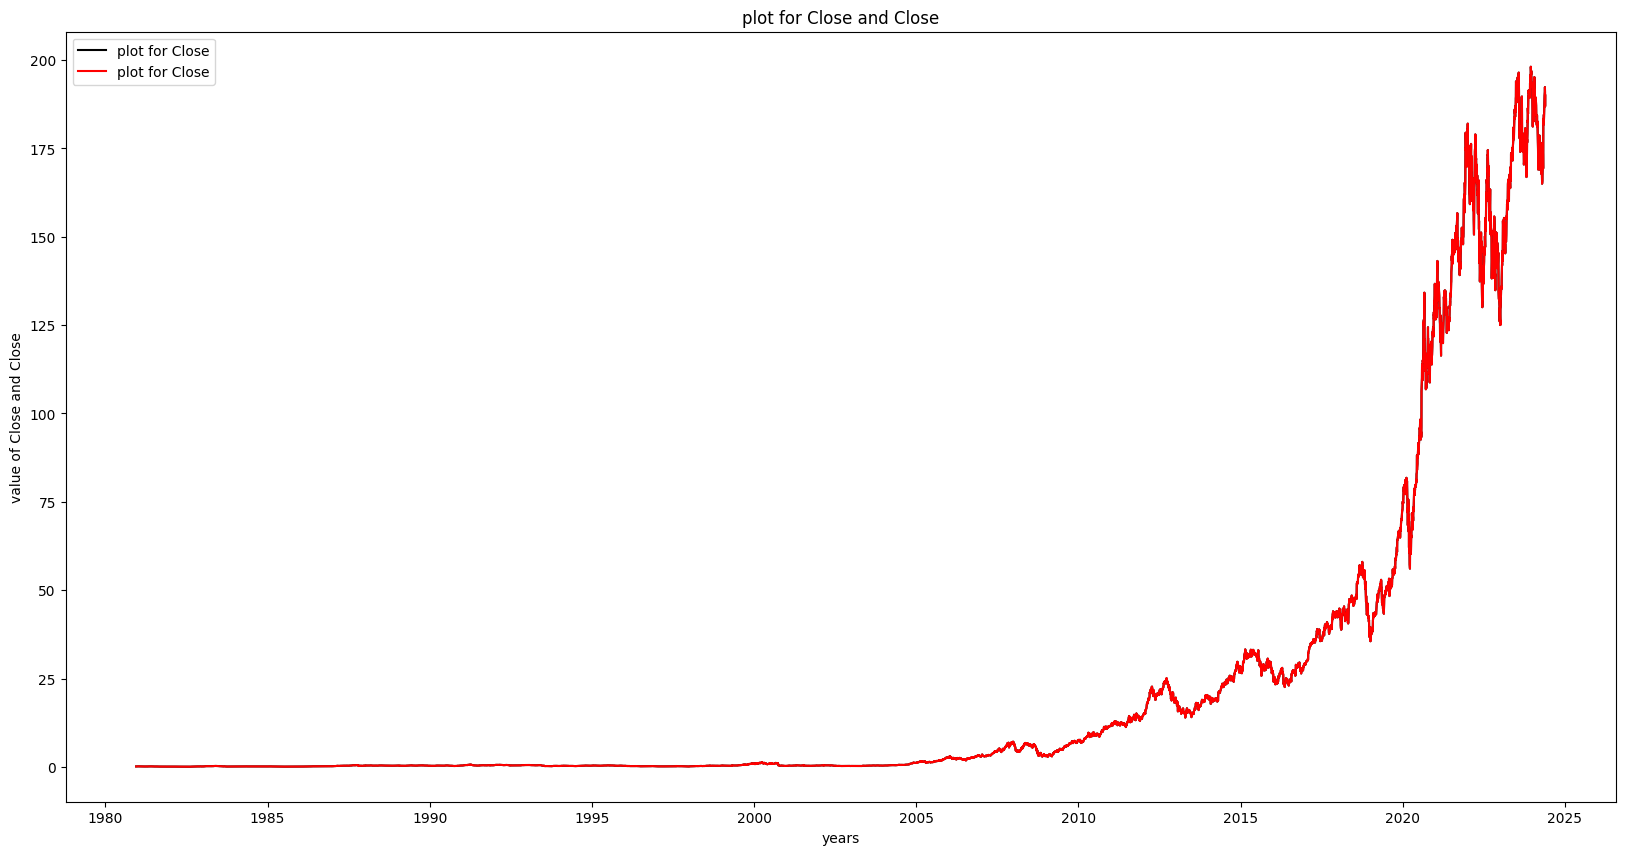

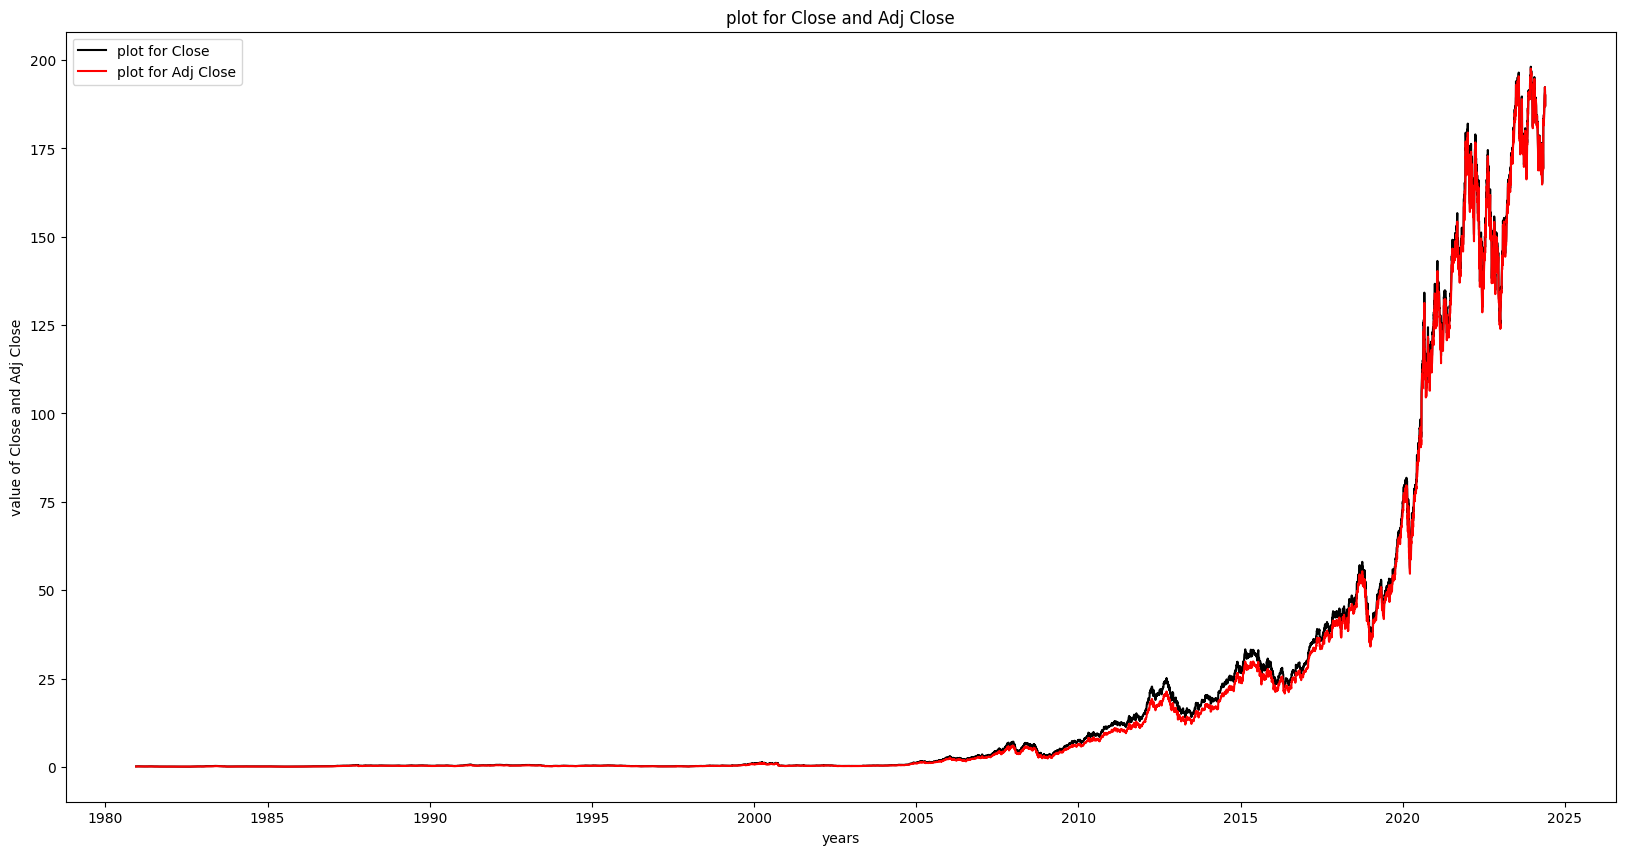

In [ ]:
def plot_graph(df:pd.DataFrame, str1: str, str2:str):
	plt.figure(figsize=(20, 10))
	plt.title(f"plot for {str1} and {str2}")
	plt.plot(df["Date"],df[str1], color="black", label=f"plot for {str1}")
	plt.plot(df["Date"], df[str2], color="red", 	label=f"plot for {str2}")
	plt.xlabel("years")
	plt.ylabel(f"value of {str1} and {str2}")
	plt.legend()
	plt.show()
for i in df.columns:
		if i!= "Date" and i!="Volume" and i!=j :
			plot_graph(df, "Close", i)


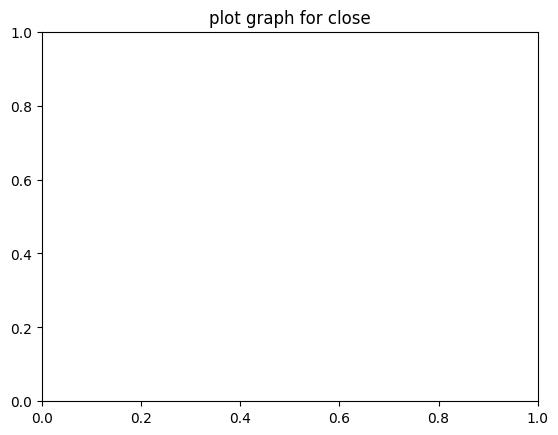

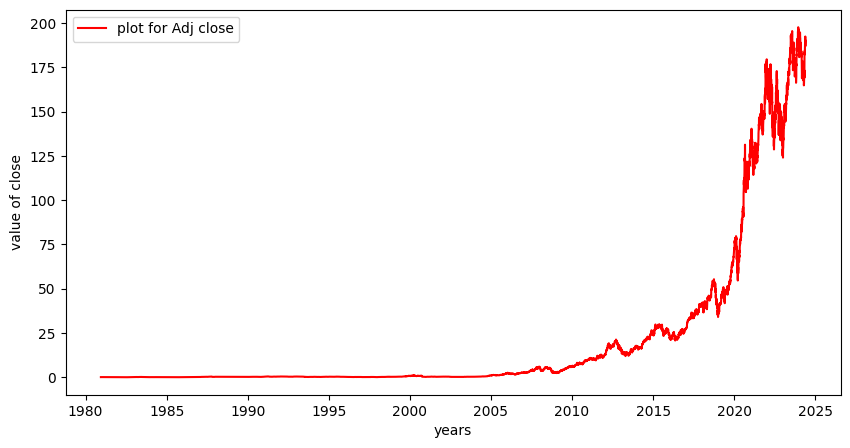

In [ ]:
def plot_single_close():
	plt.title("plot graph for close")
	plt.figure(figsize=(10, 5))
	plt.plot(df["Date"], df["Adj Close"], color="red", label="plot for Adj close")
	plt.xlabel("years")
	plt.ylabel("value of close")
	plt.legend()
	plt.show()
plot_single_close()
# tai sao 2020 co phieu tang (nam bung no cua Apple voi su ra mat cua iphone12)
# tai sao sau nam cuoi 2021 - dau 2023 co phieu giam
# dieu j khien co phieu 2024-2025 tang
# dieu j khien anh huong gia close thi truong, benh dich, san pham moi ra
# tat high, low , adj close ,open deu anh huong toi gia close  (su bien thien gia close co su trung khop cao voi cac gia khac)
# nhieu outlier phia tren (co nhieu gia tri nam ngoai su phan phoi thong thuong trong du lieu), iqr thap (phan lon cac gia tri tap trung lai voi nhau )


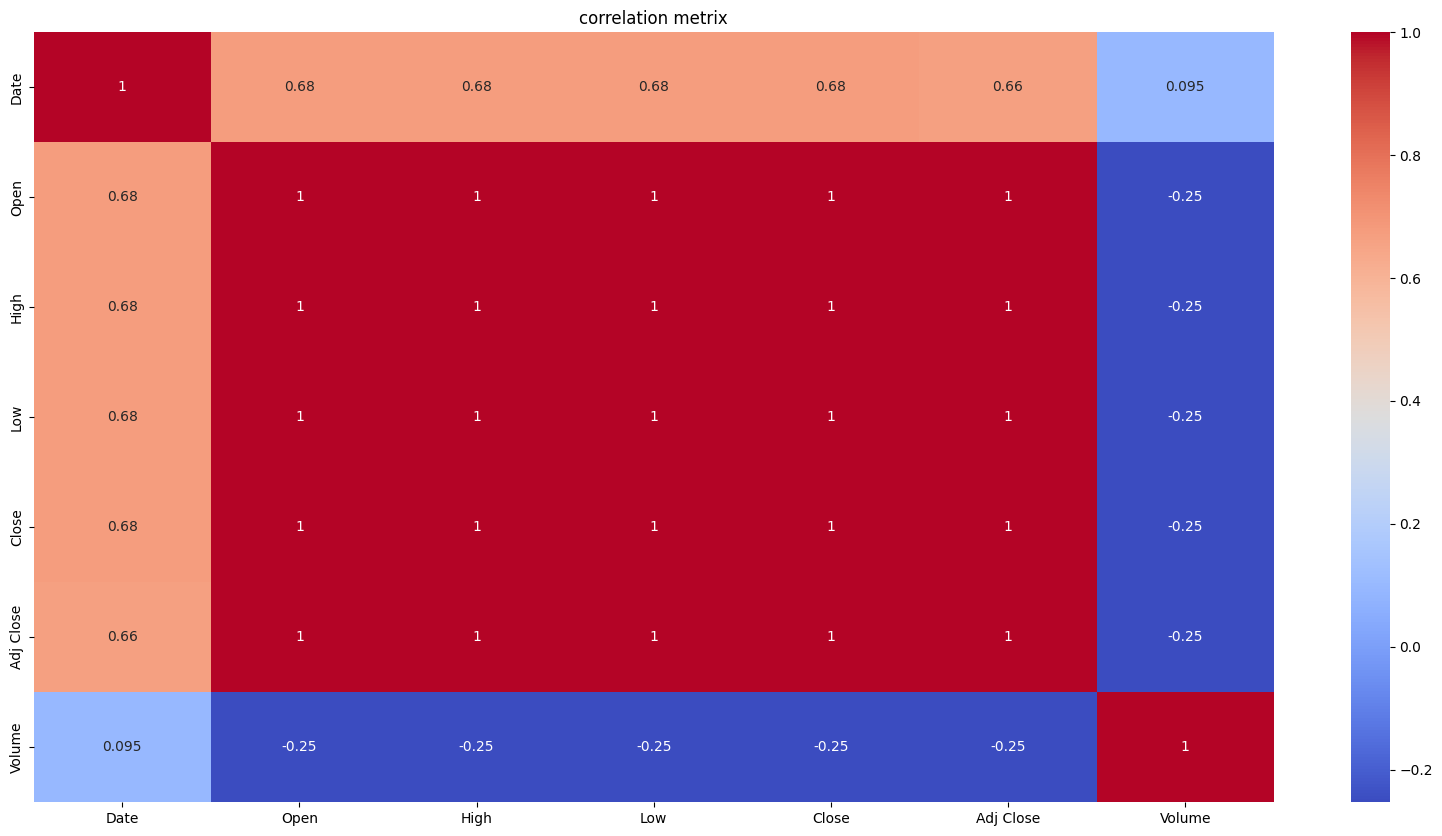

In [ ]:
plt.figure(figsize=(20,10))
corr_metrix= df[df.columns].corr()
sns.heatmap(corr_metrix, annot=True, cmap="coolwarm")
plt.title("correlation metrix")
plt.show()

In [ ]:
data= pd.DataFrame()
df["MA_for_100_day"]= df["Adj Close"].rolling(100).mean()
data["MA_for_100_day"]= df["MA_for_100_day"]
data["Adj Close"]= df["Adj Close"]
data

,MA_for_100_day,Adj Close
0,NaN,0.099058
1,NaN,0.093890
2,NaN,0.086999
3,NaN,0.089152
4,NaN,0.091737
...,...,...
10949,179.468154,191.039993
10950,179.465228,192.350006
10951,179.443514,190.899994
10952,179.392072,186.880005


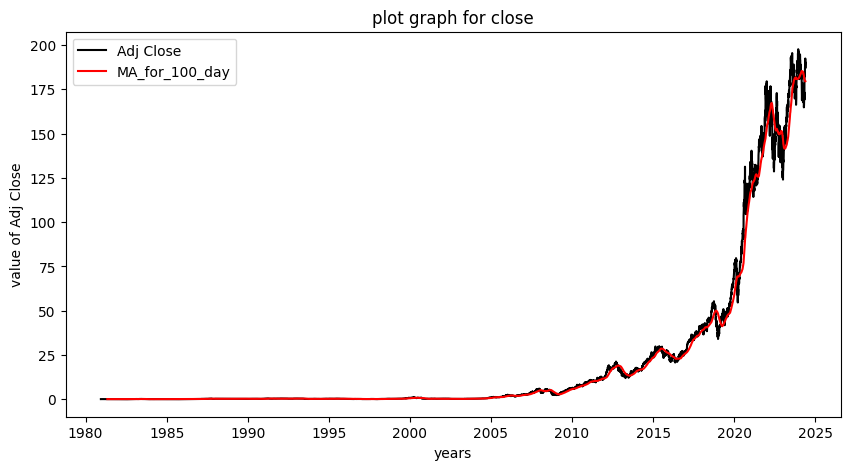

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Adj Close"], color="black", label="Adj Close")
plt.plot(df["Date"],data['MA_for_100_day'], color="red", label="MA_for_100_day")
plt.title("plot graph for close")
plt.xlabel("years")
plt.ylabel("value of Adj Close")
plt.legend()
plt.show()

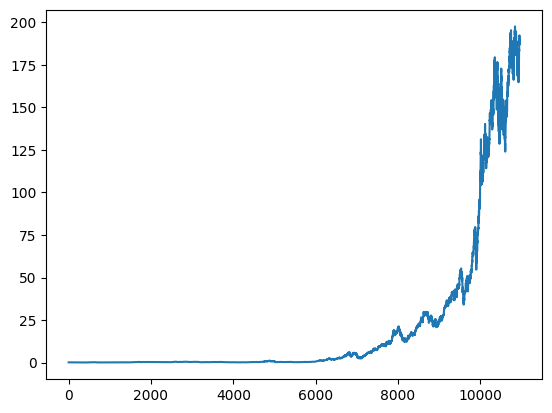

In [ ]:
df_Adj_close= df["Adj Close"]
plt.plot(df_Adj_close)


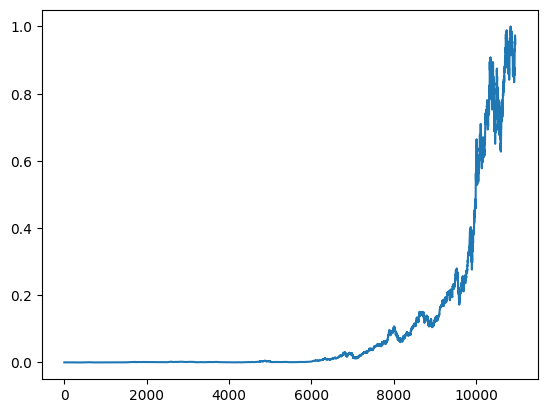

In [ ]:
#0- 1
from sklearn.preprocessing import MinMaxScaler
Scale= MinMaxScaler(feature_range=(0,1))
scale_data= Scale.fit_transform(np.array(df_Adj_close).reshape(-1,1))
scale_data.min(), scale_data.max()
plt.plot(scale_data)

In [ ]:
x_data=[]
y_data=[]
for i in range(100, scale_data.shape[0]):
  x_data.append(scale_data[i-100:i,0])
  y_data.append(scale_data[i,0])
y_data

[0.0002921362989763946,
 0.00029649971541868825,
 0.00028559623628098457,
 0.00028559623628098457,
 0.0002834195900278683,
 0.00027687952733245825,
 0.0002877779445021314,
 0.00029649971541868825,
 0.0002877779445021314,
 0.0003030397781140983,
 0.00033138173711688506,
 0.00035536027967737825,
 0.0003531836334242619,
 0.000383702238680165,
 0.000383702238680165,
 0.00038588394690131187,
 0.00038588394690131187,
 0.0003575419878985251,
 0.0003575419878985251,
 0.0003684404050681983,
 0.00035972369611967194,
 0.00034010350803344194,
 0.00035100192520311506,
 0.0003575419878985251,
 0.0003815205304590182,
 0.00037498046776360825,
 0.0003728038215104919,
 0.0003619003423727883,
 0.0003531836334242619,
 0.00035100192520311506,
 0.00033574009159114825,
 0.00031611990350491825,
 0.0003248366124534445,
 0.00031175648706262455,
 0.0003226599662003283,
 0.00031611990350491825,
 0.0002986763616718046,
 0.0002616126317524609,
 0.00025725427727819774,
 0.00025725427727819774,
 0.0002419975056342615

In [ ]:
x_data[0], y_data[0]

(array([0.00030958, 0.00028342, 0.00024854, 0.00025944, 0.00027252,
        0.00030086, 0.00032484, 0.00034664, 0.00037498, 0.00042731,
        0.00043602, 0.00042077, 0.00040333, 0.00040987, 0.00039679,
        0.00037062, 0.00034664, 0.00033574, 0.00036408, 0.00035972,
        0.0003401 , 0.00034228, 0.00035318, 0.00034882, 0.00038152,
        0.00036408, 0.00037498, 0.00038152, 0.00037934, 0.00037062,
        0.00036626, 0.00034882, 0.0003292 , 0.00030086, 0.00027252,
        0.00028996, 0.0003074 , 0.0003074 , 0.00030958, 0.00028342,
        0.00028342, 0.00026816, 0.00026379, 0.0002529 , 0.00026379,
        0.00028342, 0.00025507, 0.00023109, 0.00023763, 0.00022238,
        0.00024854, 0.00025507, 0.00027034, 0.00027252, 0.00026598,
        0.00026161, 0.00025944, 0.00025507, 0.0002202 , 0.00020057,
        0.00018531, 0.00020057, 0.00019621, 0.00021147, 0.00023109,
        0.00025725, 0.0002529 , 0.00025725, 0.0002747 , 0.00027252,
        0.00026379, 0.00025507, 0.00023982, 0.00

In [ ]:
# x_test , y_test = 0.3 , y_train , x_train= 0.7
len_x= int(len(x_data)*0.7)
len_y= int(len(y_data)*0.7)

In [ ]:

splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
x_train= np.array(x_train).reshape(-1,100,1)
x_test= np.array(x_test).reshape(-1,100,1)
y_train= np.array(y_train).reshape(-1,1)
y_test= np.array(y_test).reshape(-1,1)


In [ ]:
# more 1 column
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(7597, 100, 1)
(7597, 1)
(3257, 100, 1)
(3257, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, ReLU,LeakyReLU
# model= Sequential()
# model.add(LSTM(units= 128, return_sequences= True, input_shape= (x_train.shape[1],4)))
# model.add(LSTM(units= 64, return_sequences= True))
# model.add(LSTM(units= 32, return_sequences= False))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dense(32))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation="sigmoid"))

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()
# 4* 128 * 130= 66,560

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer= Adam(learning_rate= 0.001), loss= "mae" )
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0045
Epoch 2/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0014
Epoch 3/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0012
Epoch 4/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 9.7163e-04
Epoch 5/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0011
Epoch 6/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012
Epoch 7/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.9253e-04
Epoch 8/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 7.0029e-04
Epoch 9/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 6.4818e-04
Epoch 10/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 6.6345e-04
Epoch 11/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 5.3257e-04
Epoch 12/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 6.3658e-04
Epoch 13/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 7.8053e-04
Epoch 14/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 5.4227e-04
Epoch 1

In [ ]:
from sklearn.metrics import accuracy_score
y_pred= model.predict(x_test)#du doan trong min max 0-1


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
y_test.shape

(3257, 1)

In [ ]:

inv_y_predicts=Scale.inverse_transform( y_pred ) # chuyen min max sang dang thuc
inv_y_test=Scale.inverse_transform( y_test.reshape(-1, y_pred.shape[-1]))


In [ ]:
print(inv_y_predicts.shape)
print(inv_y_test.shape)

(3257, 1)
(3257, 1)


In [ ]:
from sklearn.metrics import median_absolute_error, mean_squared_error
mae = mean_squared_error(inv_y_predicts, inv_y_test )
print("Median absolute error:", mae)

Median absolute error: 96.61577130968305


In [ ]:
data_pre = pd.DataFrame({
    "y_test": inv_y_test.reshape(-1),
    "y_pred": inv_y_predicts.reshape(-1),
    "date": df['Date'].iloc[len_x + 100: len_x + 100 + len(inv_y_test)],
}
)

In [ ]:
data_pre.head(:)

,y_test,y_pred,date
7697,9.818124,9.885424,2011-06-16
7698,9.670166,9.820296,2011-06-17
7699,9.521006,9.673671,2011-06-20
7700,9.822351,9.515931,2011-06-21
7701,9.741124,9.757403,2011-06-22


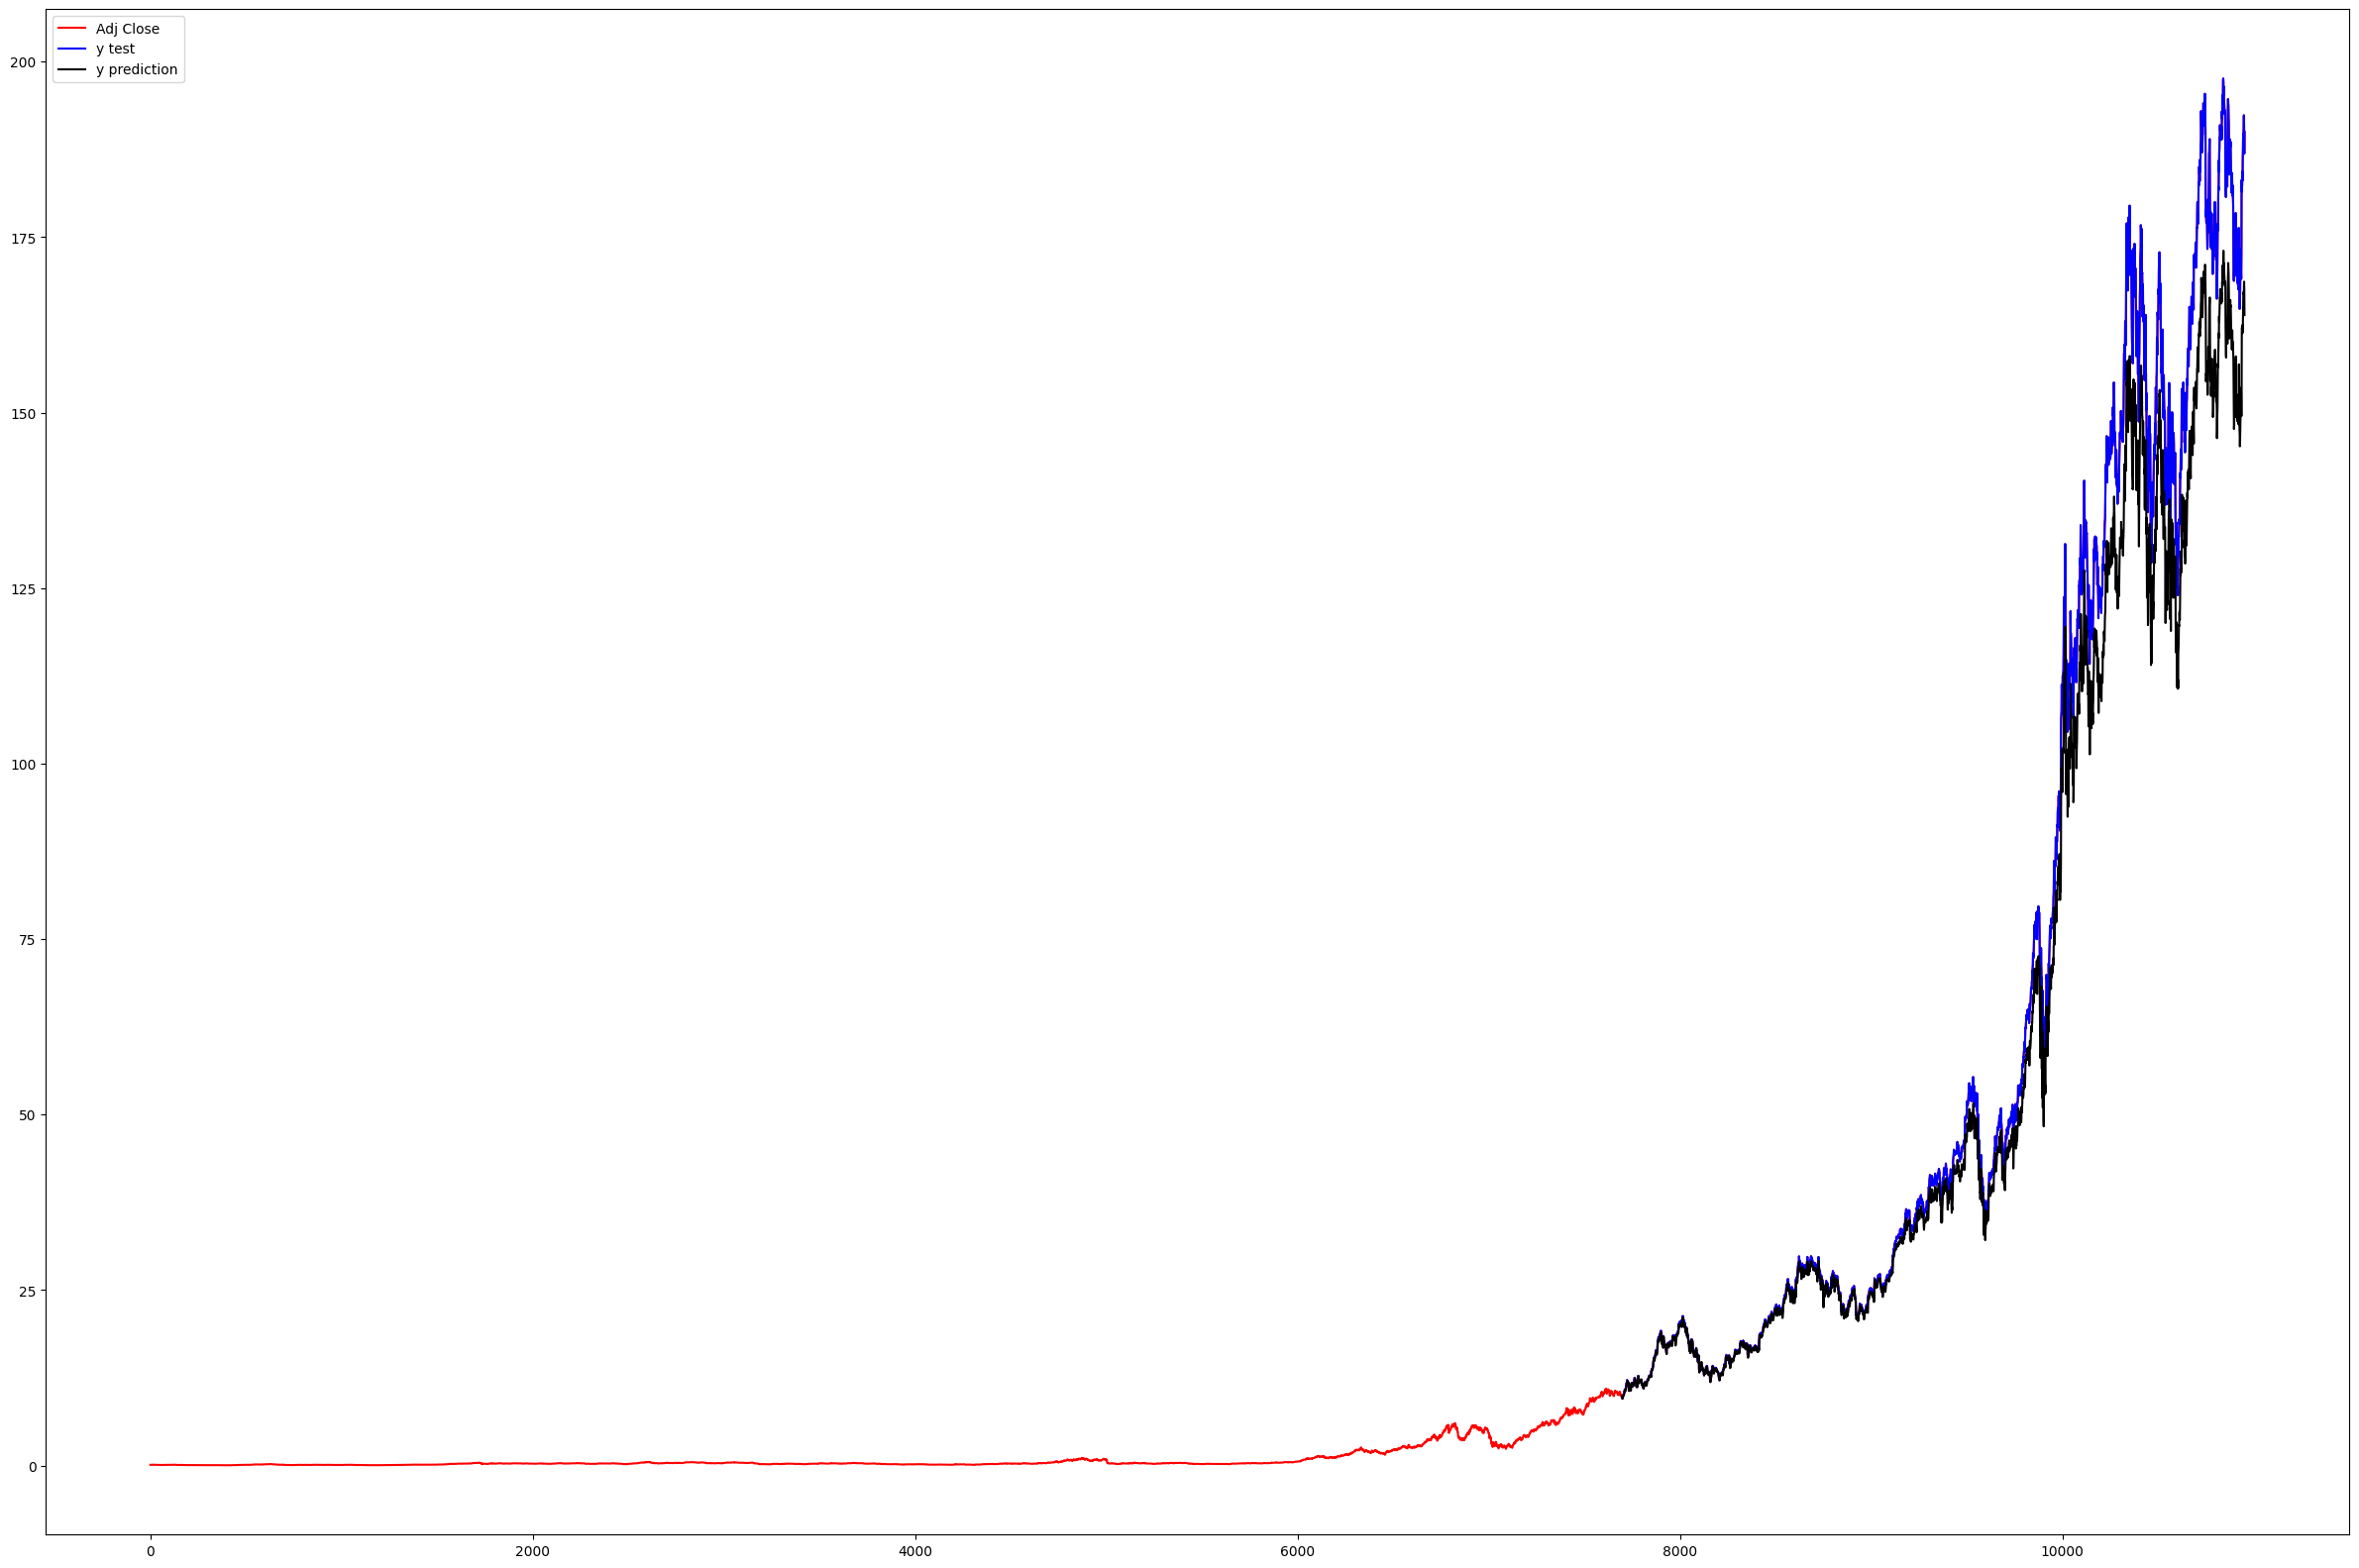

In [ ]:
plt.figure(figsize=(30,20))
plt.plot(df["Adj Close"], color="red", label="Adj Close")
plt.plot(data_pre["y_test"], color="blue", label="y test")
plt.plot(data_pre["y_pred"],color="black", label="y prediction")
plt.legend()
plt.show()


In [ ]:
model.save("model.keras")

In [ ]:
from tensorflow.keras.models import load_model
model= load_model("model.keras")
model.predict(x_test)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[0.04984785],
       [0.04951818],
       [0.04877596],
       ...,
       [0.8535427 ],
       [0.84819525],
       [0.8294005 ]], dtype=float32)